# Historical Menus & Linking Data
Name: **Yuşa Ece DEMIRAL**

StudentID: **14947285**

Email: [**ece.demiral@student.uva.nl**](ece.demiral@student.uva.nl)

Submitted on: **22.03.2024**

GitHub Link: https://github.com/DYusa/data-foodmenu.git

# Data Context

In this research, we aim to use tabular data from New York Public Library’s ’What’s on the Menu?’ initiative [1], as well as open-sourced WikiData for the classification of dishes with regards to sustainability. Integration of data sets will begin with establishing links between the historical menu data and corresponding WikiData entries using relevant identifiers, such as food names and ingredients. During this process, missing data links, irrelevant entries, and mismatches will be identified. The first and last appearances of a dish will be valuable in our understanding of temporal trends. 

[1] @misc{Menus.nypl.org, url={https://menus.nypl.org/data}, journal={Menus.nypl.org}} 

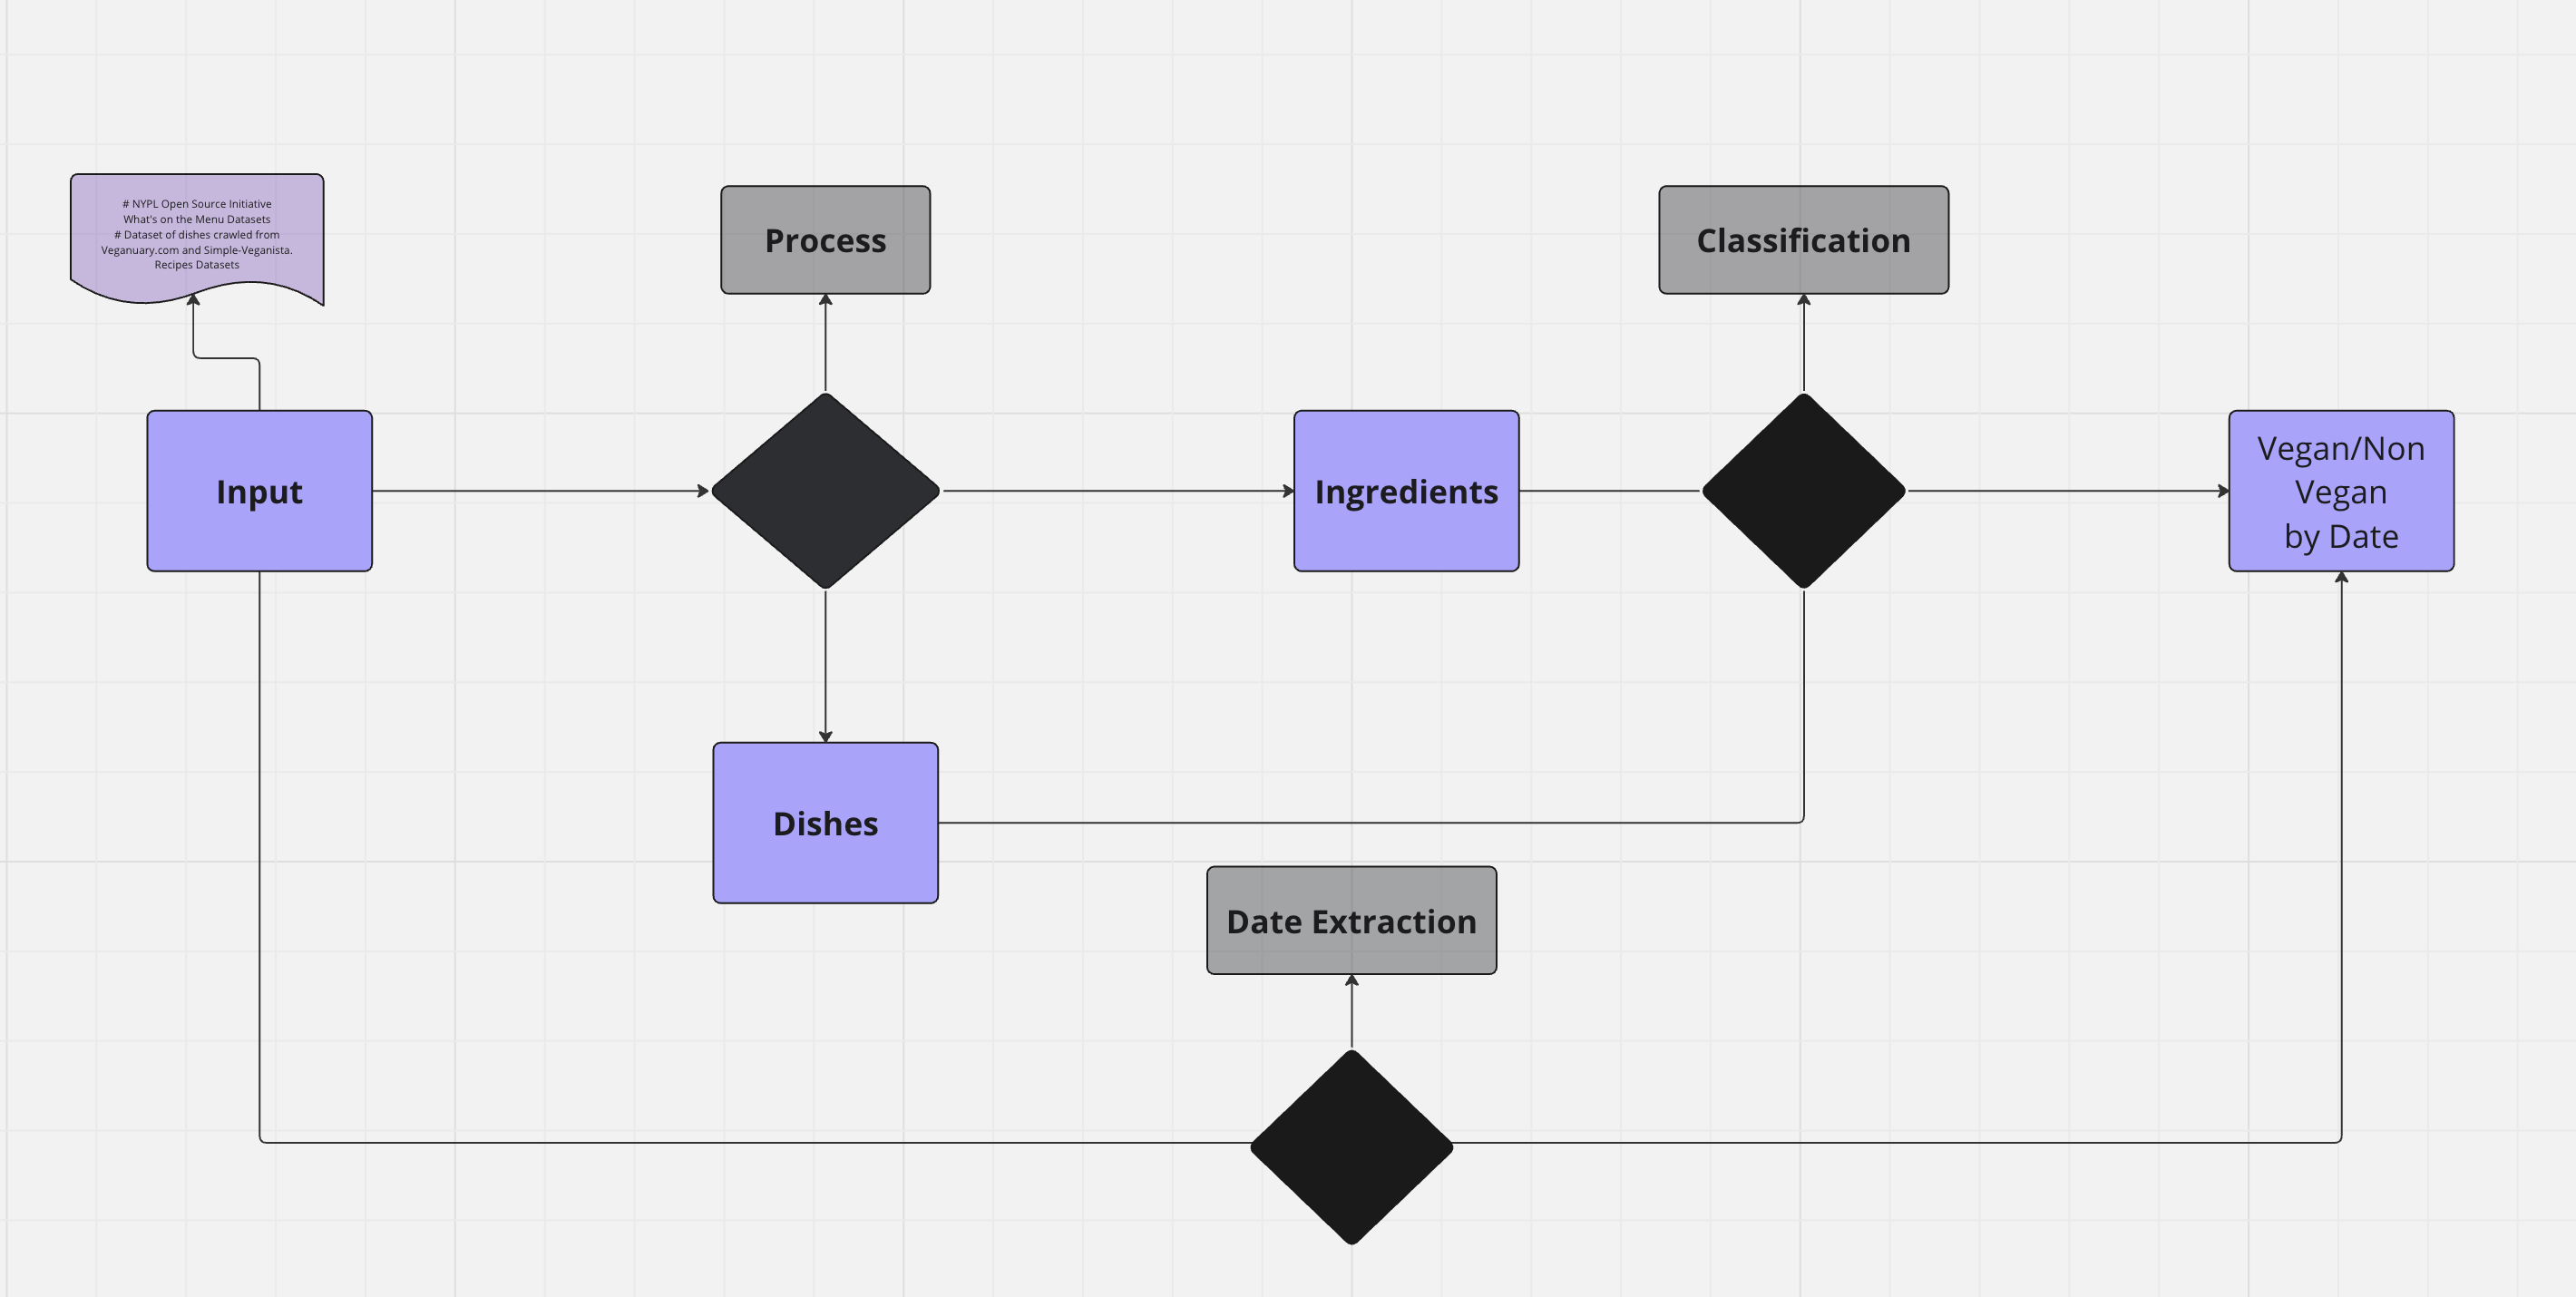

# Data Description
Restaurant menus reflect culinary preferences, principles, and eating habits. They preserve the discourse on food consumption patterns, most importantly through dish repetition on various menus highlighting the trends of these patterns. On menus and the stories they tell, Li et al. proposes a two-component based approach with metadata and menu content, where meta data is composed of details such as name, location, and date compared to menu content consisting of dish names, prices that offer insights into culinary trends and preferences across different locations and periods \cite{LiHouChenLiu }. Best to our knowledge, analysis based on their content is limited. Trostler et al, focused on the interaction environmental and societal changes effect on the culinary spheres of the United States, however does not explicitly state its methodology \cite{Trostler2007}. Further research on the content of historical menus revealed the trend of decline in menu diversity, and discussed factors contributing to this transformation. Hence, highlighted the need for menu analysis as a tool for studying dietary patterns across cultures and time \cite{MEISELMAN2017174}. This concern can be diligently handled by data science {kavitha2023}

Let's take a look into the proposed research approach with Datasets!

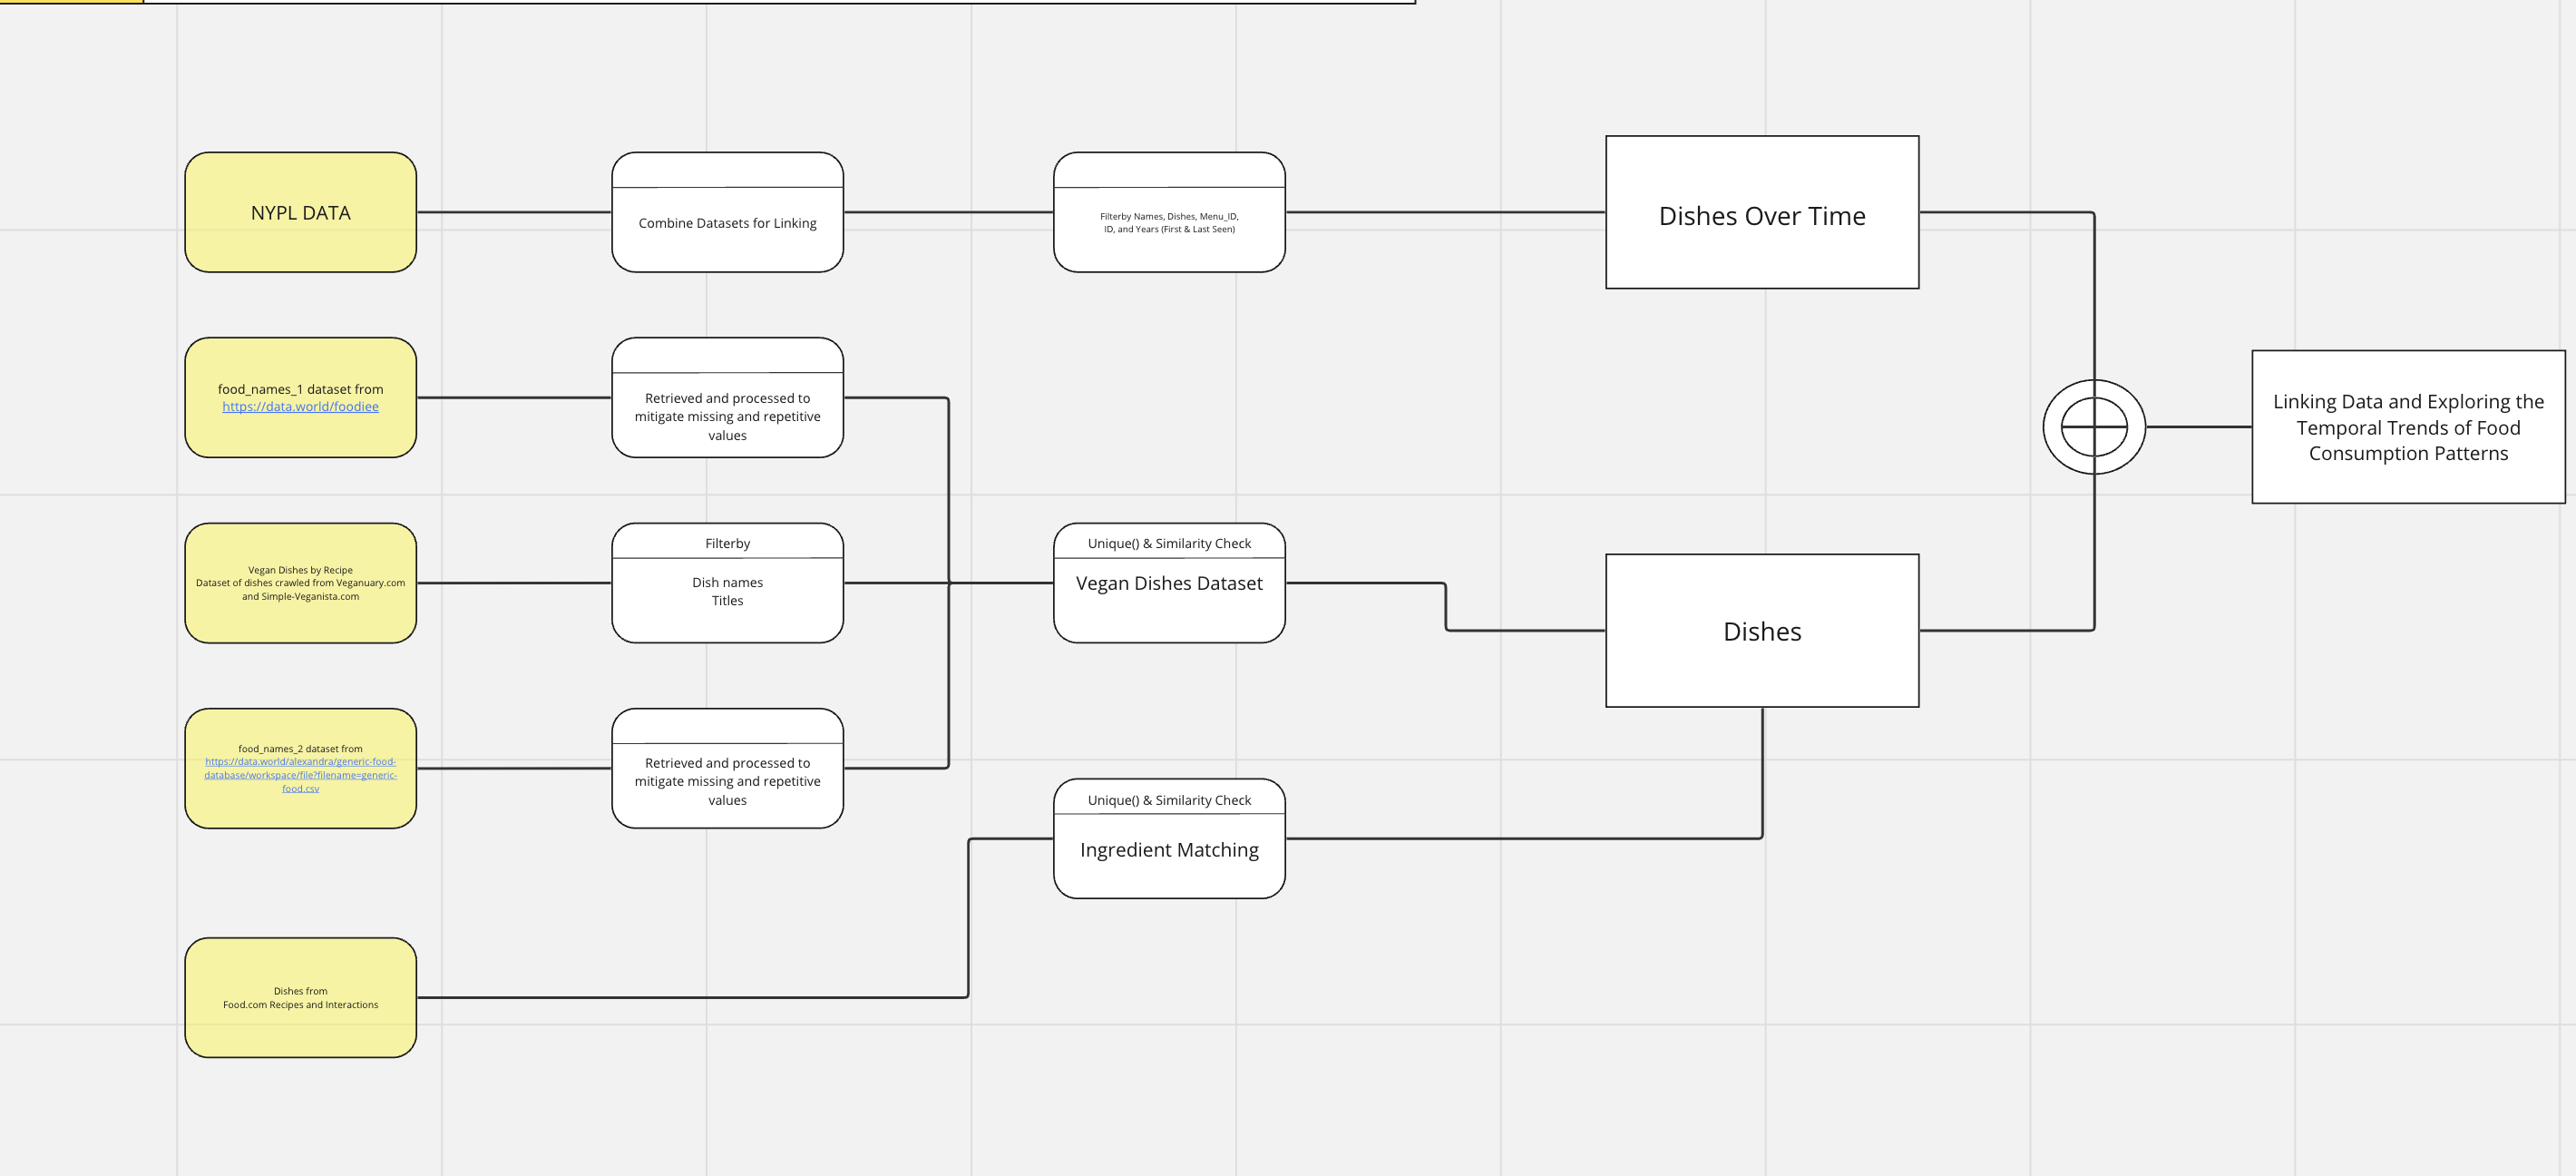

We aim to use historical menu datasets as our main resource of data from the New York Public Library’s “What’s on the menu?” initiative to link them with external open-source datasets to create a classifier and compare previous models working with historical archives linkage. 
    **Content of the datasets**
Menu Items: The dataset includes a vast array of menu items offered by various restaurants, ranging from appetizers, entrees, and desserts to beverages and specialty dishes.
Restaurant Information: It provides details about the restaurants, including their names, locations, types of cuisine, and historical context.
Prices: Where available, the dataset contains information about the prices of menu items, offering insights into the cost of dining during different time periods.
Metadata: Additional metadata such as dates of menus, meal times (e.g., breakfast, lunch, dinner), and any annotations or special features are included to provide context and facilitate analysis.


To seek if a dish is vegan or not we can leverage previous datasets concerned with the vegan dishes.


---


### Imports & Library Dependencies

In [26]:
# # Imports
# import numpy as np       # Numerical computing with arrays and matrices
# import pandas as pd      
# from tabulate import tabulate  # Formatting tabular data -this project is based on tabular data
# import warnings          # Managing warning messages 
# import os                # Operating system-dependent functionality - uncalled
# import duckdb            # SQL database
# import matplotlib.pyplot as plt  # Creating pretty visualizations
# import seaborn as sns    # Statistical data visualization
# import requests          # Making HTTP requests for the images of the menus
# from IPython.display import Image  # Displaying images in IPython
# from plotnine import ggplot, aes, geom_density, labs  # Creating complex statistical plots
# from fuzzywuzzy import fuzz  # String matching 
# from fuzzywuzzy import process
# import networkx as nx # network map
# from collections import defaultdict #play with tabular
# import ast
# from plotnine import *
# import plotnine
# from wordcloud import WordCloud


In [2]:
# warnings.filterwarnings('ignore') 


### Data Loading

In [28]:
# dataset_path= '/Users/yusaeced/Desktop/data-foodmenu/Menus_Data'
# #dataset of New York Library's 'What's on the Menu?'' initiative consists of four sub-sets as following :
# menu = pd.read_csv('/Users/yusaeced/Desktop/data-foodmenu/Menus_Data/Menu.csv', na_values="", dtype=str)
# menu_page = pd.read_csv('/Users/yusaeced/Desktop/data-foodmenu/Menus_Data/MenuPage.csv', na_values="", dtype=str)
# menu_item = pd.read_csv('/Users/yusaeced/Desktop/data-foodmenu/Menus_Data/MenuItem.csv', na_values="", dtype=str)
# dish = pd.read_csv('/Users/yusaeced/Desktop/data-foodmenu/Menus_Data/Dish.csv', na_values="", dtype=str)
# # Dish name datasets for checking the inherent language differences
# food_names_1 = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/generic_food.csv', na_values="", dtype=str )
# food_names_2 = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/only_dishes.csv', na_values="", dtype=str )
# # Vegan dishes from Recipes.com 
# vegan = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/vegan_dishes.csv', na_values="", dtype=str)
# # Dataset of dishes crawled from Veganuary.com and Simple-Veganista.
# vegan_dishes = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/scrapped_vegan_recipes.csv', na_values="", dtype=str)


In [5]:
# dataset_path

'/Users/yusaeced/Desktop/data-foodmenu/Menus_Data'

In [6]:
# raw_recipes = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/FOOD/RAW_recipes.csv')
# raw_interactions = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/FOOD/RAW_interactions.csv')
# pp_recipes = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/FOOD/PP_recipes.csv')
# pp_users = pd.read_csv('/Users/yusaeced/Desktop/Block_4/EDA/FOOD/PP_users.csv')
# ingr_map = pd.read_pickle('/Users/yusaeced/Desktop/Block_4/EDA/FOOD/ingr_map.pkl')

### Data Summary

In [84]:
print(menu.info())
menu_summary = menu.describe()
print(menu_summary)
print(menu_page.info())
print(menu_item.info())
print(dish.info())
dish_summary = dish.describe()
print(dish_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17547 entries, 0 to 17546
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    17547 non-null  object
 1   name                  3199 non-null   object
 2   sponsor               15986 non-null  object
 3   event                 8154 non-null   object
 4   venue                 8119 non-null   object
 5   place                 8123 non-null   object
 6   physical_description  14765 non-null  object
 7   occasion              3791 non-null   object
 8   notes                 10615 non-null  object
 9   call_number           15985 non-null  object
 10  keywords              0 non-null      object
 11  language              0 non-null      object
 12  date                  16961 non-null  object
 13  location              17547 non-null  object
 14  location_type         0 non-null      object
 15  currency              6456 non-null 

### Dataset Merging

First, dataset merging combines multiple DataFrames (menu, dish, menu_item, and menu_page) into a single DataFrame (final_merged_df) by matching rows based on their shared 'id' column.

In [ ]:
# #dish_menu_df = menu.merge(dish, how='inner', on='id')
# item_df= dish_menu_df.merge(menu_item,how='inner', on='id')
# final_merged_df = item_df.merge(menu_page, how='inner', on='id')
# final_merged_df

This approach will allow us to gain insights into how eating patterns are evolving over time by analyzing the relationship between dishes and dietary preferences (vegan, vegetarian, meat-based). By linking the dish dataset with external datasets on dietary preferences, we can track changes in consumer behavior and preferences towards different types of dishes. Additionally, analyzing their historical patterns will provide further understanding of ingredient trends, such as the appearance, disappearance, or reappearance of specific ingredients.

In [ ]:
#dish

For the Food dataset with ingredients

In [8]:
# recipes = pp_recipes.merge(right=raw_recipes, left_on="id", right_on="id")
# recipes = recipes[["id", "name", "submitted", "ingredient_ids", "ingredients", "n_ingredients"]]
# recipes = recipes.rename({"id":"recipe_id"}, axis="columns")
# recipes.head()

recipe_id                                name   submitted  \
0     424415  aromatic basmati rice  rice cooker  2010-05-10   
1     146223               pumpkin pie a la easy  2005-11-25   
2     312329    cheesy tomato soup with potatoes  2008-07-07   
3      74301                          mini tacos  2003-10-29   
4      76272            rosemary s hanky panky s  2003-11-12   

                                      ingredient_ids  \
0                      [389, 7655, 6270, 1527, 3406]   
1  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...   
2  [1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...   
3   [7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]   
4                            [3484, 6324, 7594, 243]   

                                         ingredients  n_ingredients  
0  ['basmati rice', 'water', 'salt', 'cinnamon st...              5  
1  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12  
2  ['chicken broth', 'water', 'salt', 'black pepp...             15  
3  ['wonton wrappers', 'hamburger', 'taco seasoni...              8  
4  ['ground beef', 'ground sausage', 'velveeta ch...              4

We will start with loading the original DataFrame containing the preprocessed ingredient strings. However, we need to rename the columns to make a clear distinction between ID types. We need to assure there are not any duplicate rows to ensure each row represent unique ingredient. 

In [74]:
# ingr_df = ingr_map.copy(deep=True)
# ingr_df = ingr_df.rename({"id":"ingr_id","replaced":"ingr_name"}, axis="columns")
# ingr_df = ingr_df[["ingr_id", "ingr_name"]]
# ingr_df = ingr_df.drop_duplicates(ignore_index=True)
# ingr_df.head(10)

ingr_id                                   ingr_name
0     4308                                     lettuce
1     2744  french vanilla pudding and pie filling mix
2     6843                      stove top stuffing mix
3     1910                                cream cheese
4     1168                                     cheddar
5     5811                                   radicchio
6     5205                                 pasta sauce
7     7233                                tomato sauce
8     6482                       shredded three cheese
9     4836                                  mozzarella

### Merge Dishes with the Ingredients 

In [17]:
# dish_ingredients = pd.merge(dish, recipes, on='name', how='left')

In [18]:
# def fuzzy_match(dish_name, choices):
#     return process.extractOne(dish_name, choices, scorer=fuzz.token_sort_ratio)

In [19]:
# dish_names_recipes= recipes['name'].tolist()

In [ ]:
# matched_dishes = []
# for dish_name in dish['name']:
#     matched_dish, score = fuzzy_match(dish_name, dish_names_recipes)
#     if score >= 80:  # threshold 
#         matched_dishes.append((dish_name, matched_dish))


In [ ]:
# matched_df = pd.DataFrame(matched_dishes, columns=['name', 'matched_dish_name'])
# final_df = pd.merge(dish, matched_df, on='name', how='left')
# final_merged_df = pd.merge(final_df, df2, left_on='matched_dish_name', right_on='name', how='left')
# final_merged_df = final_merged_df.drop(columns=['name'])  # Drop redundant 'name' column from recipes


In [ ]:
# final_merged_df

### Uses of Merged Data

In [119]:
# final_merged_df.head()

# web_id = final_merged_df.iloc[0]['uuid'] 
# link_start = "http://j2k.repo.nypl.org/adore-djatoka/resolver?url_ver=Z39.88-2004&rft_id=urn:uuid:"
# link_end = "&svc_id=info:lanl-repo/svc/getRegion&svc_val_fmt=info:ofi/fmt:kev:mtx:jpeg2000&svc.format=image/jpeg&svc.scale=1800,0&svc.rotate=0"

# image_link = link_start + web_id + link_end

# response = requests.get(image_link)
# img = Image(response.content)
# display(img)

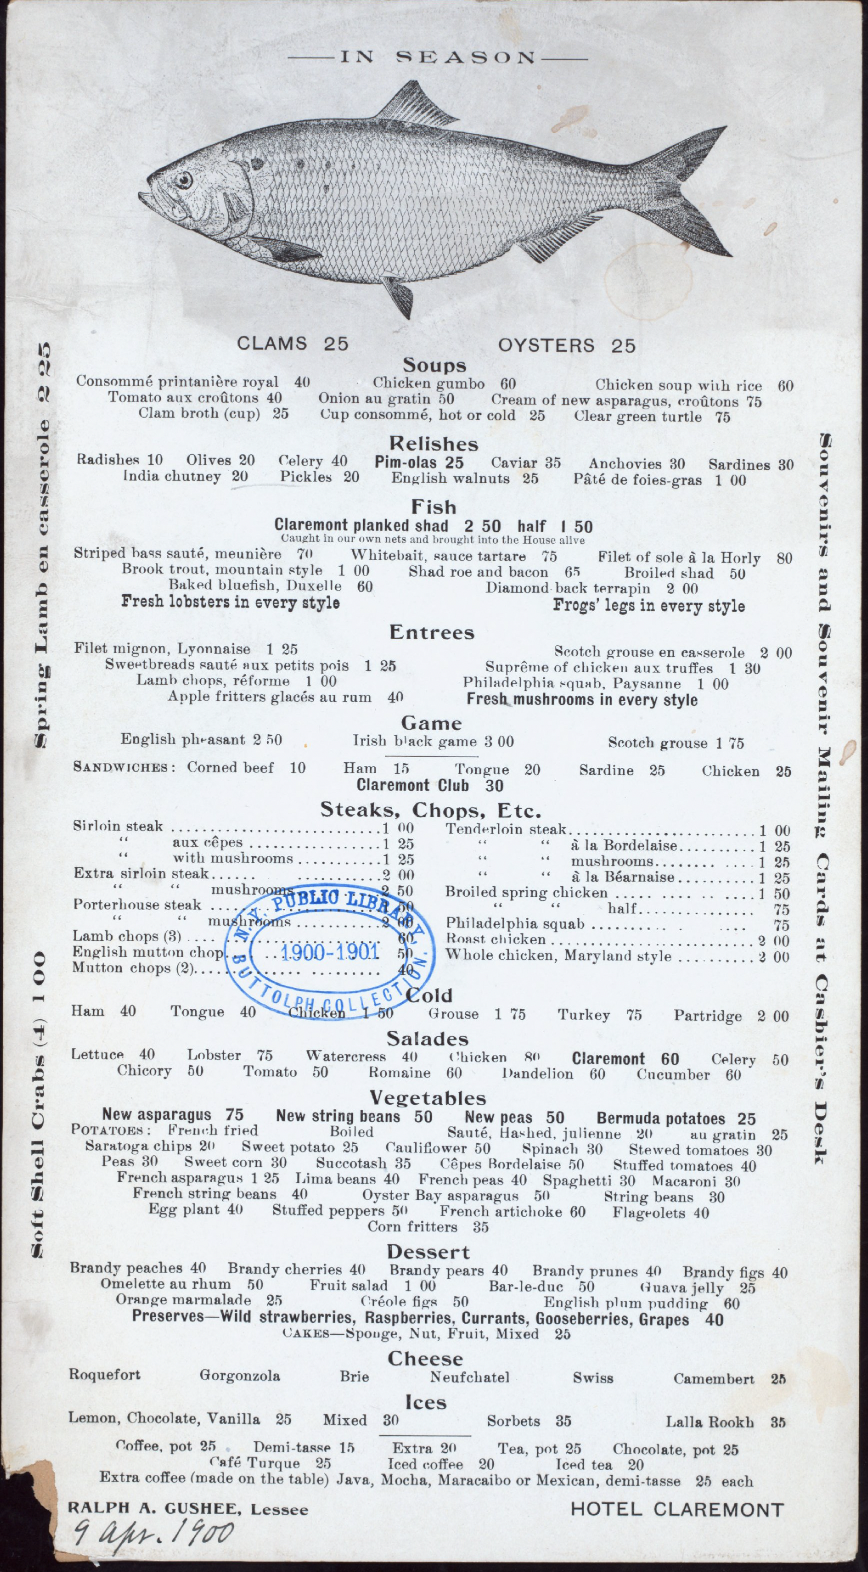

### Data Profiling

In [ ]:
# print("Profile Menu - Date column helps with the historical analysis.")

# menu['date'] = pd.to_datetime(menu['date'], errors='coerce')

# valid_dates_count = menu['date'].notnull().sum()
# invalid_dates_count = menu['date'].isnull().sum()

# total_dates = menu.shape[0]
# percentage_invalid_dates = round((invalid_dates_count / total_dates) * 100, 2)

# print("Valid Dates Count:", valid_dates_count)
# print("Invalid Dates Count:", invalid_dates_count)
# print("Percentage of Invalid Dates:", percentage_invalid_dates, "%")

Profile Menu - Date column helps with the historical analysis
Valid Dates Count: 16956
Invalid Dates Count: 591
Percentage of Invalid Dates: 3.37 %

In [ ]:
# menu['year'] = pd.to_datetime(menu['date'], errors='coerce').dt.year.astype('Int64')

### Data Integrity Check-Point # Cuf Cuf!

In [ ]:
# "Verifying all values in id column are distinct."
# # result_df = menu.groupby('id').size().reset_index(name='cnt_id')
# result_df = result_df[result_df['cnt_id'] > 1]
# # print(result_df)
# result_df = menu.query('id.isnull()')
# #print(result_df)

# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.")
# print("\n\nVerifying all values in id column are non-null.")

Verifying all values in id column are distinct.
Empty DataFrame
Columns: [id, cnt_id]
Index: []
Empty DataFrame
Columns: [id, name, sponsor, event, venue, place, physical_description, occasion, notes, call_number, keywords, language, date, location, location_type, currency, currency_symbol, status, page_count, dish_count]
Index: [] 
Zero matches - no remediation necessary. Verifying all values in id column are non-null.

In [ ]:
# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.")
# result_df = menu[(menu['page_count'] == 0) | menu['page_count'].isnull()]

# print(result_df)
# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.")

# print("\n\nsponsor should not be blank or null")
# result_df = menu[(menu['sponsor'].isnull()) | (menu['sponsor'] == '')].head(4)


# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.")

# result_df = result_df[['id', 'name', 'sponsor', 'event', 'location', 'status', 'page_count']]
# print(tabulate(result_df.head(10), headers='keys', tablefmt='psql'))


Zero matches - no remediation necessary.
page_count should not be blank or null
Columns: [id, name, sponsor, event, venue, place, physical_description, occasion, notes, call_number, keywords, language, date, location, location_type, currency, currency_symbol, status, page_count, dish_count]
Index: []
Zero matches - no remediation necessary.
sponsor should not be blank or null

In [38]:
# print("Verifying all values in id column are distinct.")
# result_df = menu.groupby('id').size().reset_index(name='cnt_id')
# result_df = result_df[result_df['cnt_id'] > 1]
# print(result_df)
# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.") 
# print("\n\nVerifying all values in id column are non-null.")
# result_df = menu.query('id.isnull()')
# print(result_df)
# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.")
# print("\n\npage_count should not be blank or null")
# result_df = menu[(menu['page_count'] == 0) | menu['page_count'].isnull()]
# print(result_df)
# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.")
# print("\n\nsponsor should not be blank or null")
# result_df = menu[(menu['sponsor'].isnull()) | (menu['sponsor'] == '')].head(4)
# if len(result_df.index) == 0:
#     print("\nZero matches - no remediation necessary.")
# result_df = result_df[['id', 'name', 'sponsor', 'event', 'location', 'status', 'page_count']]
# print(tabulate(result_df.head(10), headers='keys', tablefmt='psql'))


<img src="![image.png](attachment:image.png)" alt="result" width="50%">

In [40]:
# #Foreign Key Constraints
# # Records in MenuPage without corresponding records in Menu table
# result = menu_page[~menu_page['menu_id'].isin(menu['id'])]
# print("Records in MenuPage without corresponding records in Menu table:", len(result))
# # Records in MenuItem without corresponding records in MenuPage table.
# result = menu_item[~menu_item['menu_page_id'].isin(menu_page['id'])]
# print("Records in MenuItem without corresponding records in MenuPage table:", len(result))
# # Records in MenuItem without corresponding records in Menu table.
# result = menu_item[~menu_item['dish_id'].isin(dish['id'])]
# print("Records in MenuItem without corresponding records in Menu table:", len(result))
# result = menu[~menu['id'].isin(menu_page['menu_id'])]
# print("Records in Menu without corresponding record in Menu table:", len(result))

Records in MenuPage without corresponding records in Menu table: 5799
Records in MenuItem without corresponding records in MenuPage table: 0
Records in MenuItem without corresponding records in Menu table: 244
Records in Menu without corresponding record in Menu table: 0

In [43]:
# result_dish = dish[dish['id'].isnull() | dish['menus_appeared'].isnull() | dish['times_appeared'].isnull()]
# print(result_dish)
# result_menuitem = menu_item[menu_item['id'].isnull() | menu_item['price'].isnull() |
#                                menu_item['dish_id'].isnull() | menu_item['created_at'].isnull() |
#                                menu_item['xpos'].isnull() | menu_item['ypos'].isnull()]

# print(result_menuitem)
# result_menupage = menu_page[menu_page['id'].isnull() | menu_page['menu_id'].isnull() | menu_page['page_number'].isnull()]
# print(result_menupage)
# result_menu = menu[menu['id'].isnull() | menu['page_count'].isnull() | menu['dish_count'].isnull()]
# print(result_menu)

[1202 rows x 7 columns]
Empty DataFrame
Columns: [id, name, sponsor, event, venue, place, physical_description, occasion, notes, call_number, keywords, language, date, location, location_type, currency, currency_symbol, status, page_count, dish_count]
Index: []

### Data Quality Check

Total dishes per menu pages

In [ ]:
# #mean values per menu dishes
# menu['dish_count'] = pd.to_numeric(menu['dish_count'], errors='coerce')
# mean_dish_count = menu['dish_count'].mean()
# mean_dish_count

75.73266085370719

In [ ]:
# # dishes range
# dish_count_range = menu['dish_count'].max() - menu['dish_count'].min()
# dish_count_range

4053

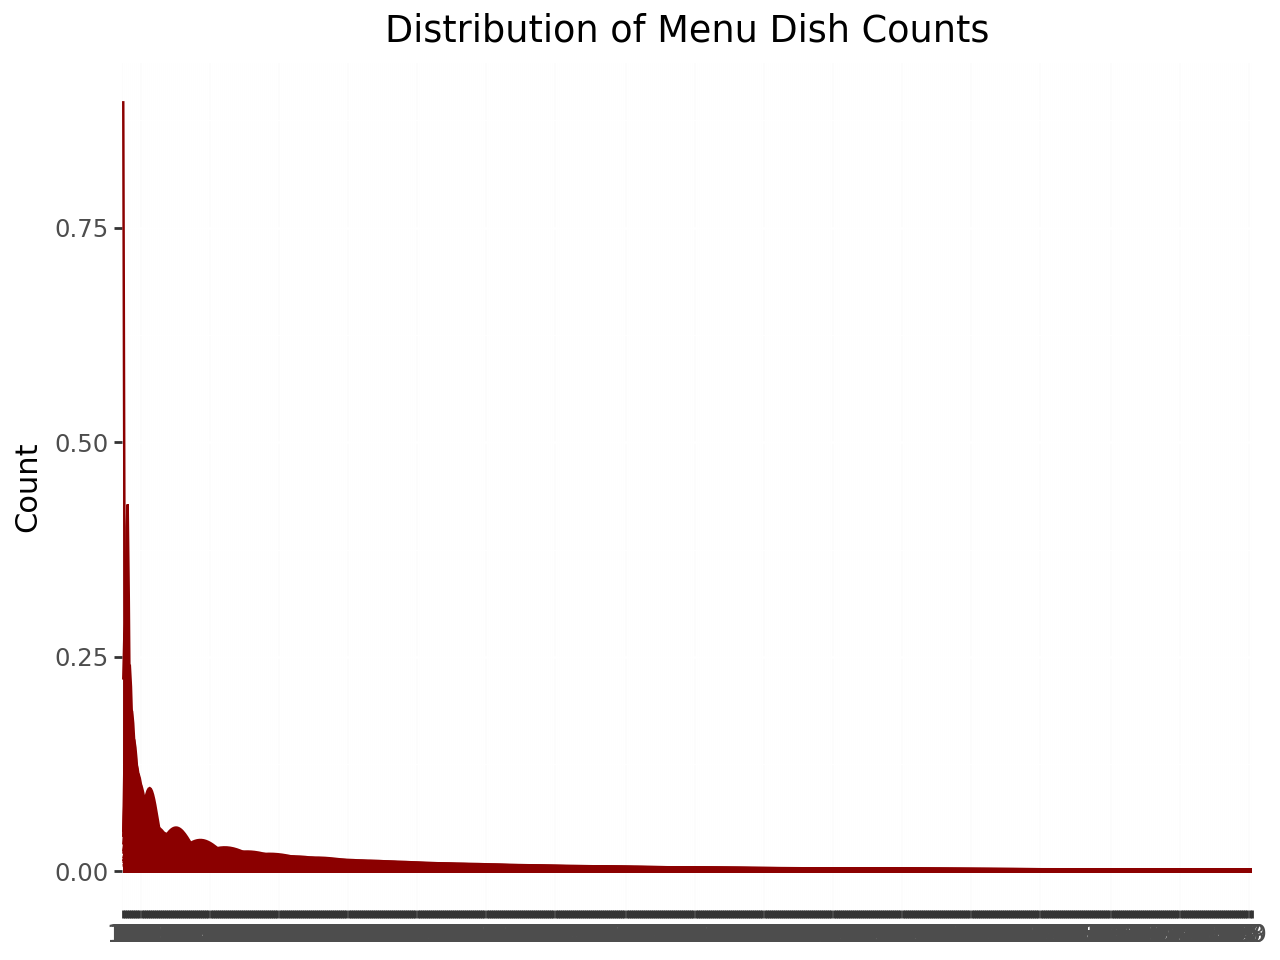

<Figure size 800x600 with 0 Axes>

In [65]:
# density_plot = (ggplot(menu, aes(x='dish_count')) +
#                 geom_density(color='darkred', fill='darkred') +
#                 labs(x="", y="Count", title="Distribution of Menu Dish Counts"))
# plt.figure(figsize=(8, 6))
# print(density_plot)

There are typically 76 items on each menu. 
This is quite elevated. There are 4053 meals on one menu.
Ultimately, there are more than 200 meals on 1,598 menus. 
As we look more closely, perhaps we can determine what is happening. 
Let us examine the median dish count per page to assist offset the impact of outliers.

In [14]:
# median_dish_count = menu['dish_count'].median()
# median_dish_count

FOOD NAME  \
0                                             Angelica   
1                                        Savoy cabbage   
2                                        Silver linden   
3                                                 Kiwi   
4                                       Allium (Onion)   
..                                                 ...   
902                                    Romaine lettuce   
903  Cow milk, pasteurized, vitamin A + D added, 0%...   
904  Cow milk, pasteurized, vitamin A + D added, 1%...   
905  Cow milk, pasteurized, vitamin A + D added, 2%...   
906  Cow milk, pasteurized, vitamin D added, 3.25% fat   

                       SCIENTIFIC NAME                   GROUP  \
0                     Angelica keiskei        Herbs and Spices   
1       Brassica oleracea var. sabauda              Vegetables   
2                       Tilia argentea        Herbs and Spices   
3                  Actinidia chinensis                  Fruits   
4                               Allium              Vegetables   
..                                 ...                     ...   
902  Lactuca sativa L. var. longifolia              Vegetables   
903                                NaN  Milk and milk products   
904                                NaN  Milk and milk products   
905                                NaN  Milk and milk products   
906                                NaN  Milk and milk products   

                   SUB GROUP  
0                      Herbs  
1                   Cabbages  
2                      Herbs  
3            Tropical fruits  
4    Onion-family vegetables  
..                       ...  
902          Leaf vegetables  
903        Unfermented milks  
904        Unfermented milks  
905        Unfermented milks  
906        Unfermented milks  

[907 rows x 4 columns]

In [ ]:
# #same for page numbers
# menu['page_count'] = pd.to_numeric(menu['page_count'], errors='coerce')
# menu_page_count = menu['page_count'].mean()
# menu_page_count

In [ ]:
# dish_page_range = menu['page_count'].max() - (menu['page_count'].min())
# dish_page_range

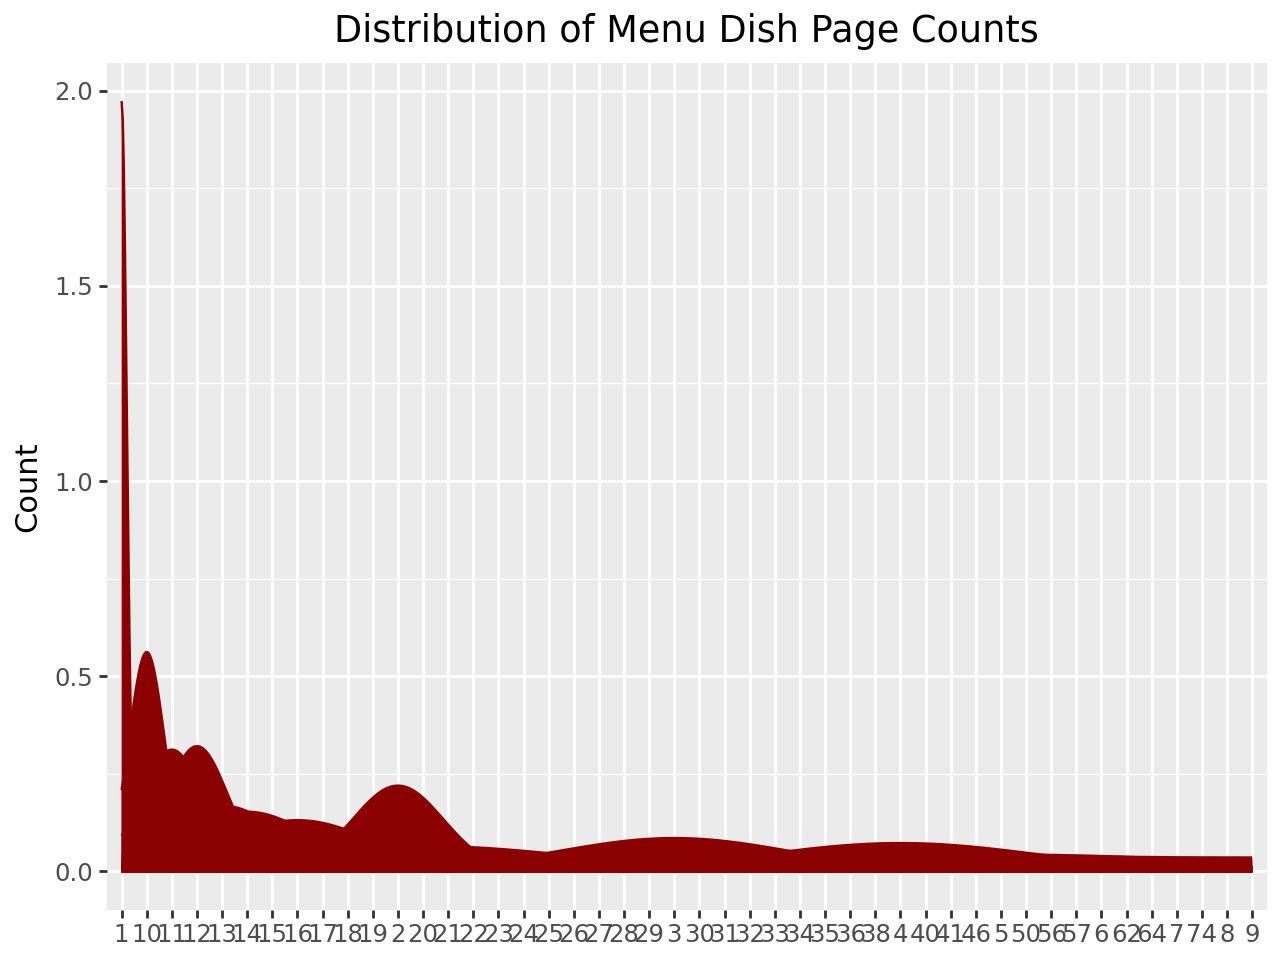

<Figure size 100x100 with 0 Axes>

In [72]:
# density_plot = (ggplot(menu, aes(x='page_count')) +
#                 geom_density(color='darkred', fill='darkred') +
#                 labs(x="", y="Count", title="Distribution of Menu Dish Page Counts"))
# plt.figure(figsize=(1, 1))  # Set the figure size
# print(density_plot)

In [76]:
# #occassions check
# sorted_occasions = menu['occasion'].value_counts().sort_values(ascending=False).head(10)
# sorted_occasions
# #Different Daily ones occur? How to fix?
# #Semiautomatic Mapping Dictionary
# replacements = {
#     'DAILY;': 'DAILY',
#     'DAILY MENU;': 'DAILY',
#     'DAILY ': 'DAILY',
#     'ANNUAL TO': 'ANNIVERSARY',
#     'ANNIVERSARY;': 'ANNIVERSARY'
# }
# menu['occasion'] = menu['occasion'].replace(replacements)
# sorted_occasions = menu['occasion'].value_counts().sort_values(ascending=False).head(10)
# sorted_occasions
# menu['occasion'] = menu['occasion'].str.rstrip(';')

# # Define the substring to check for
# substring = 'DAILY'

# # Check if the 'occasion' column contains the substring
# daily_mask = menu['occasion'].str.contains(substring, case=False)

# # Replace values based on the condition
# menu.loc[daily_mask, 'occasion'] = 'DAILY'

# # Define another substring to replace
# another_substring = 'ANNUAL TO'

# # Check if the 'occasion' column contains the substring
# annual_mask = menu['occasion'].str.contains(another_substring, case=False)

# # Replace values based on the condition
# menu.loc[annual_mask, 'occasion'] = 'ANNIVERSARY'

# # Count occurrences of each unique value in the 'occasion' column
# sorted_occasions = menu['occasion'].value_counts().sort_values(ascending=False).head(10)

# print(sorted_occasions)

In [77]:
# # EVENTS
# sorted_events = menu['event'].value_counts().sort_values(ascending=False).head(20)
# menu['event'] = menu['event'].str.replace(r'[^\w\s]', '').str.upper()
# sorted_events = menu['event'].value_counts().sort_values(ascending=False).head(20)
# sorted_events

### FREQUENCY, INGREDIENTS & ALL THAT JAZZ

***Word Cloud for Pretty Most Common Dish Names***

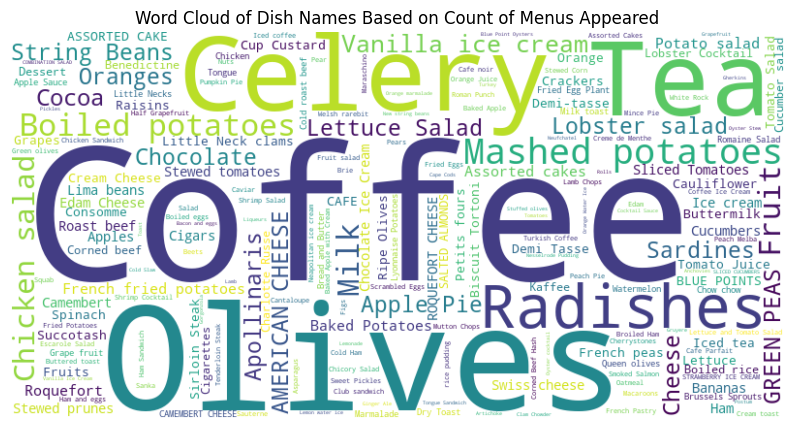

In [29]:
# dish['menus_appeared'] = pd.to_numeric(dish['menus_appeared'], errors='coerce')

# # Drop rows where 'menus_appeared' is NaN
# dish = dish.dropna(subset=['menus_appeared'])

# dish_counts = dish.groupby('name')['menus_appeared'].sum().to_dict()

# wordcloud = WordCloud(width=800, height=400, background_color='white')

# # Frequency based word cloud
# wordcloud.generate_from_frequencies(dish_counts)

# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Dish Names Based on Count of Menus Appeared')
# plt.show()

***Looking at the apperances of dishes over time***

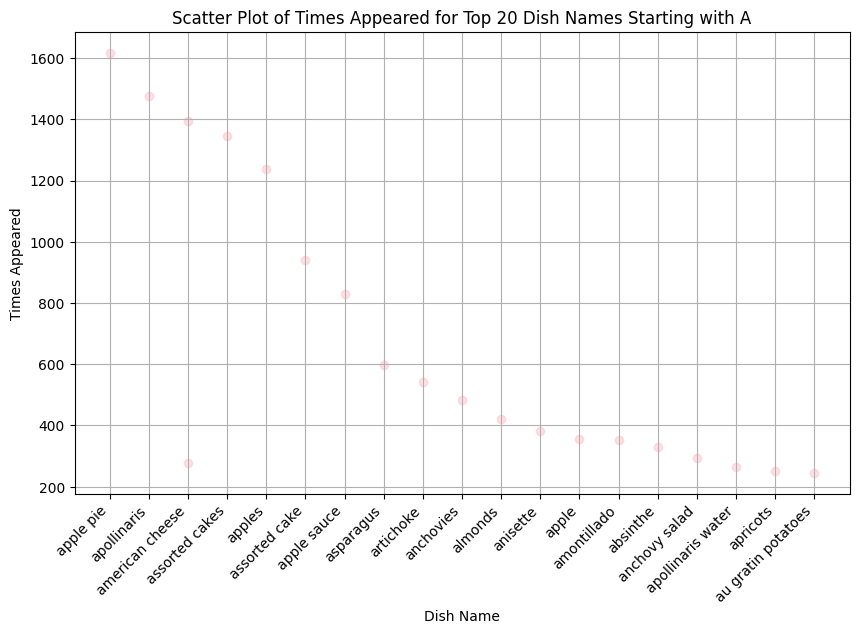

In [50]:
# dish['times_appeared'] = pd.to_numeric(dish['times_appeared'], errors='coerce')

# filtered_df = dish[dish['name'].str.startswith('A')].dropna(subset=['times_appeared'])

# # Forthe top 10 dishes based on the number of times appeared
# top_10_names_starting_with_A = filtered_df.nlargest(20, 'times_appeared')

# # Extracting values
# titles = top_10_names_starting_with_A['name'].str.lower()
# times_appeared = top_10_names_starting_with_A['times_appeared']

# plt.figure(figsize=(10, 6))
# plt.scatter(titles, times_appeared, color='pink', alpha=0.5)
# plt.title('Scatter Plot of Times Appeared for Top 20 Dish Names Starting with A')
# plt.xlabel('Dish Name')
# plt.ylabel('Times Appeared')
# plt.xticks(rotation=45, ha='right')  
# plt.grid(True)
# plt.show()

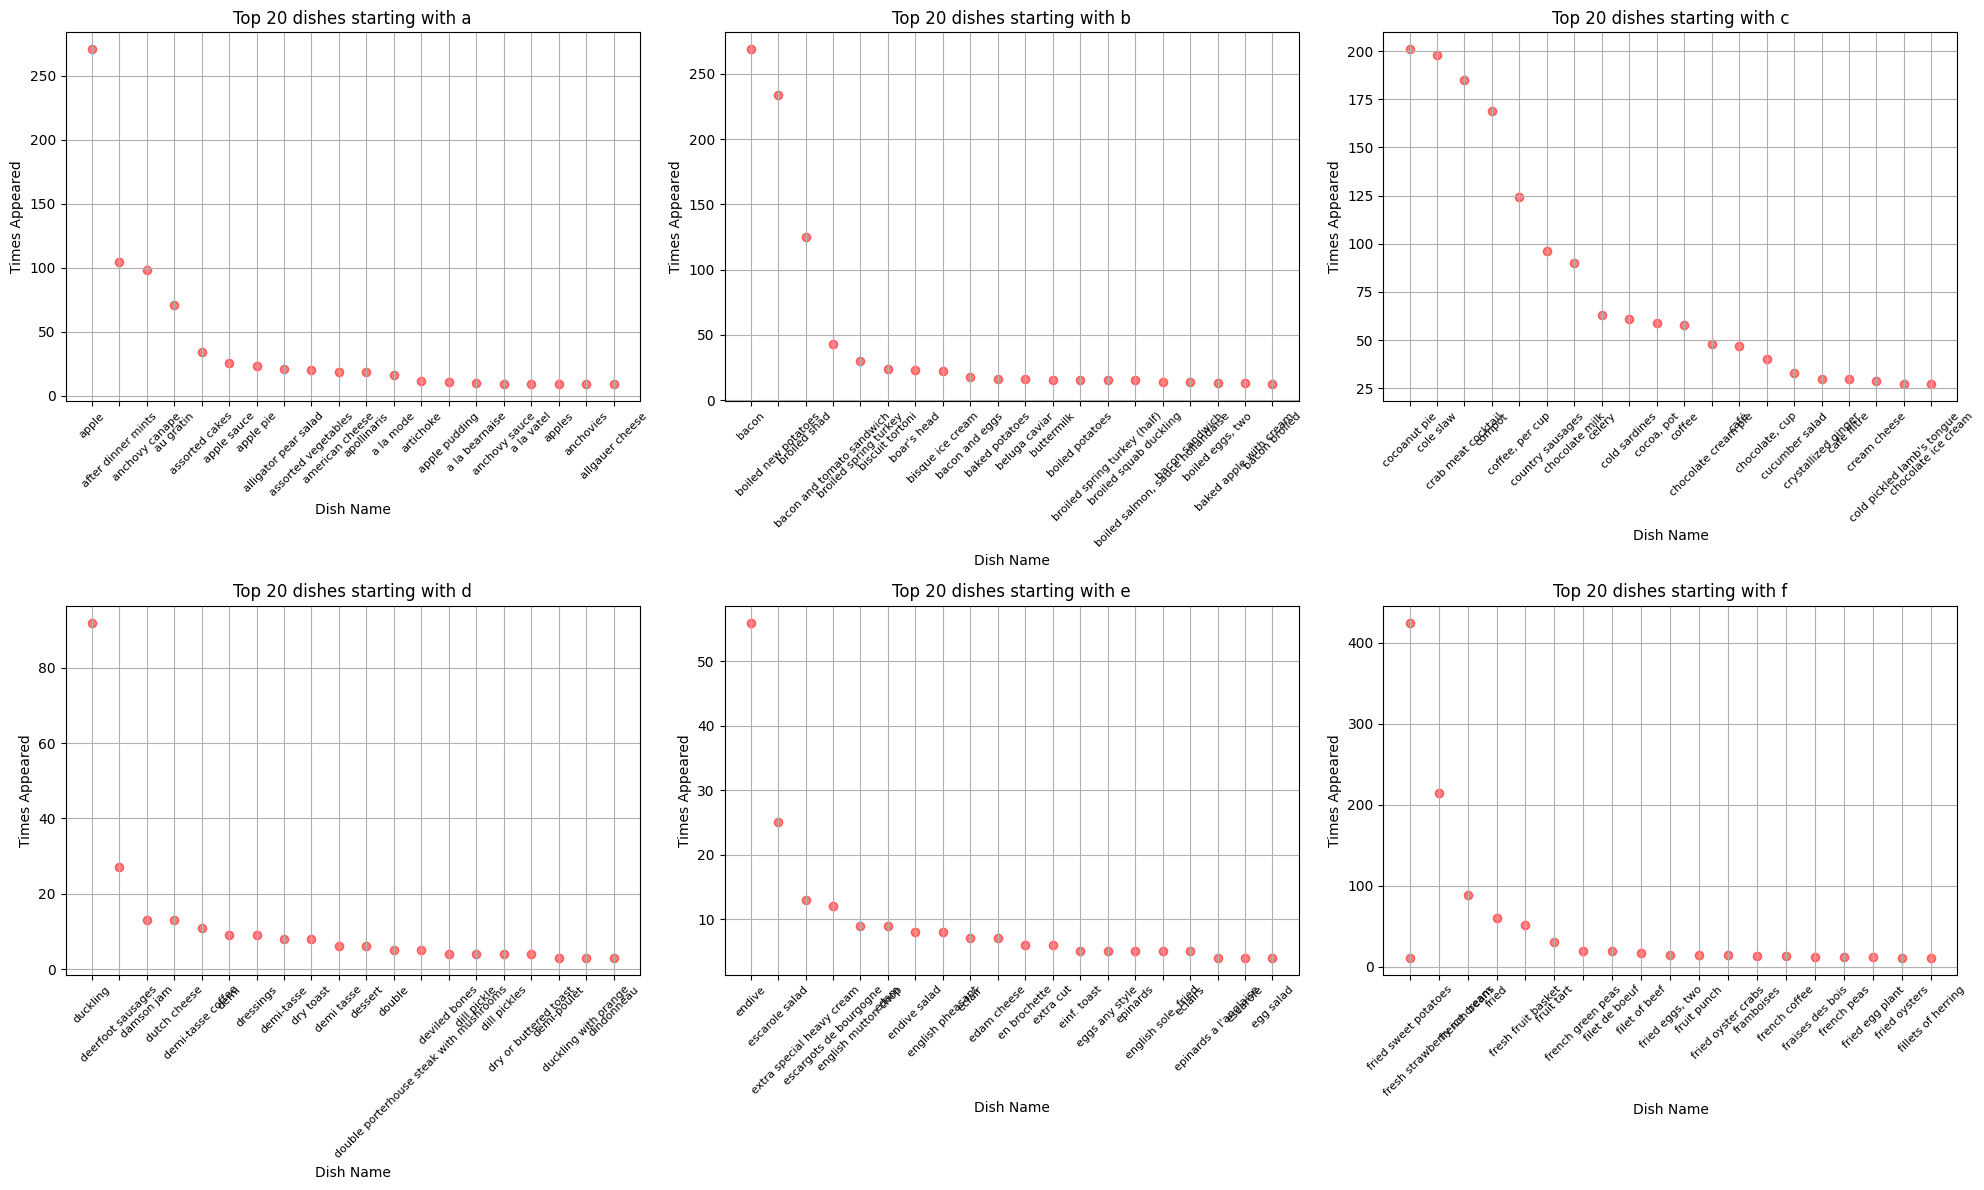

In [79]:
# dish['times_appeared'] = pd.to_numeric(dish['times_appeared'], errors='coerce')

# # Filter dishes whose names start with each letter of the alphabet
# filtered_dishes = {}
# for letter in 'abcdef':
#     filtered_df = dish[dish['name'].str.startswith(letter)].dropna(subset=['times_appeared'])
#     top_20_names = filtered_df.nlargest(20, 'times_appeared')
#     filtered_dishes[letter] = top_20_names

# fig, axes = plt.subplots(2,3 , figsize=(20, 12))
# axes = axes.ravel()

# for i, (letter, df) in enumerate(filtered_dishes.items()):
#     titles = df['name'].str.lower()
#     times_appeared = df['times_appeared']
#     ax = axes[i]
#     ax.scatter(titles, times_appeared, color='red', alpha=0.5)
#     ax.set_title(f'Top 20 dishes starting with {letter}')
#     ax.set_xlabel('Dish Name')
#     ax.set_ylabel('Times Appeared')
#     ax.tick_params(axis='x', rotation=45, labelsize=8)
#     ax.grid(True)

# plt.tight_layout()
# plt.show()

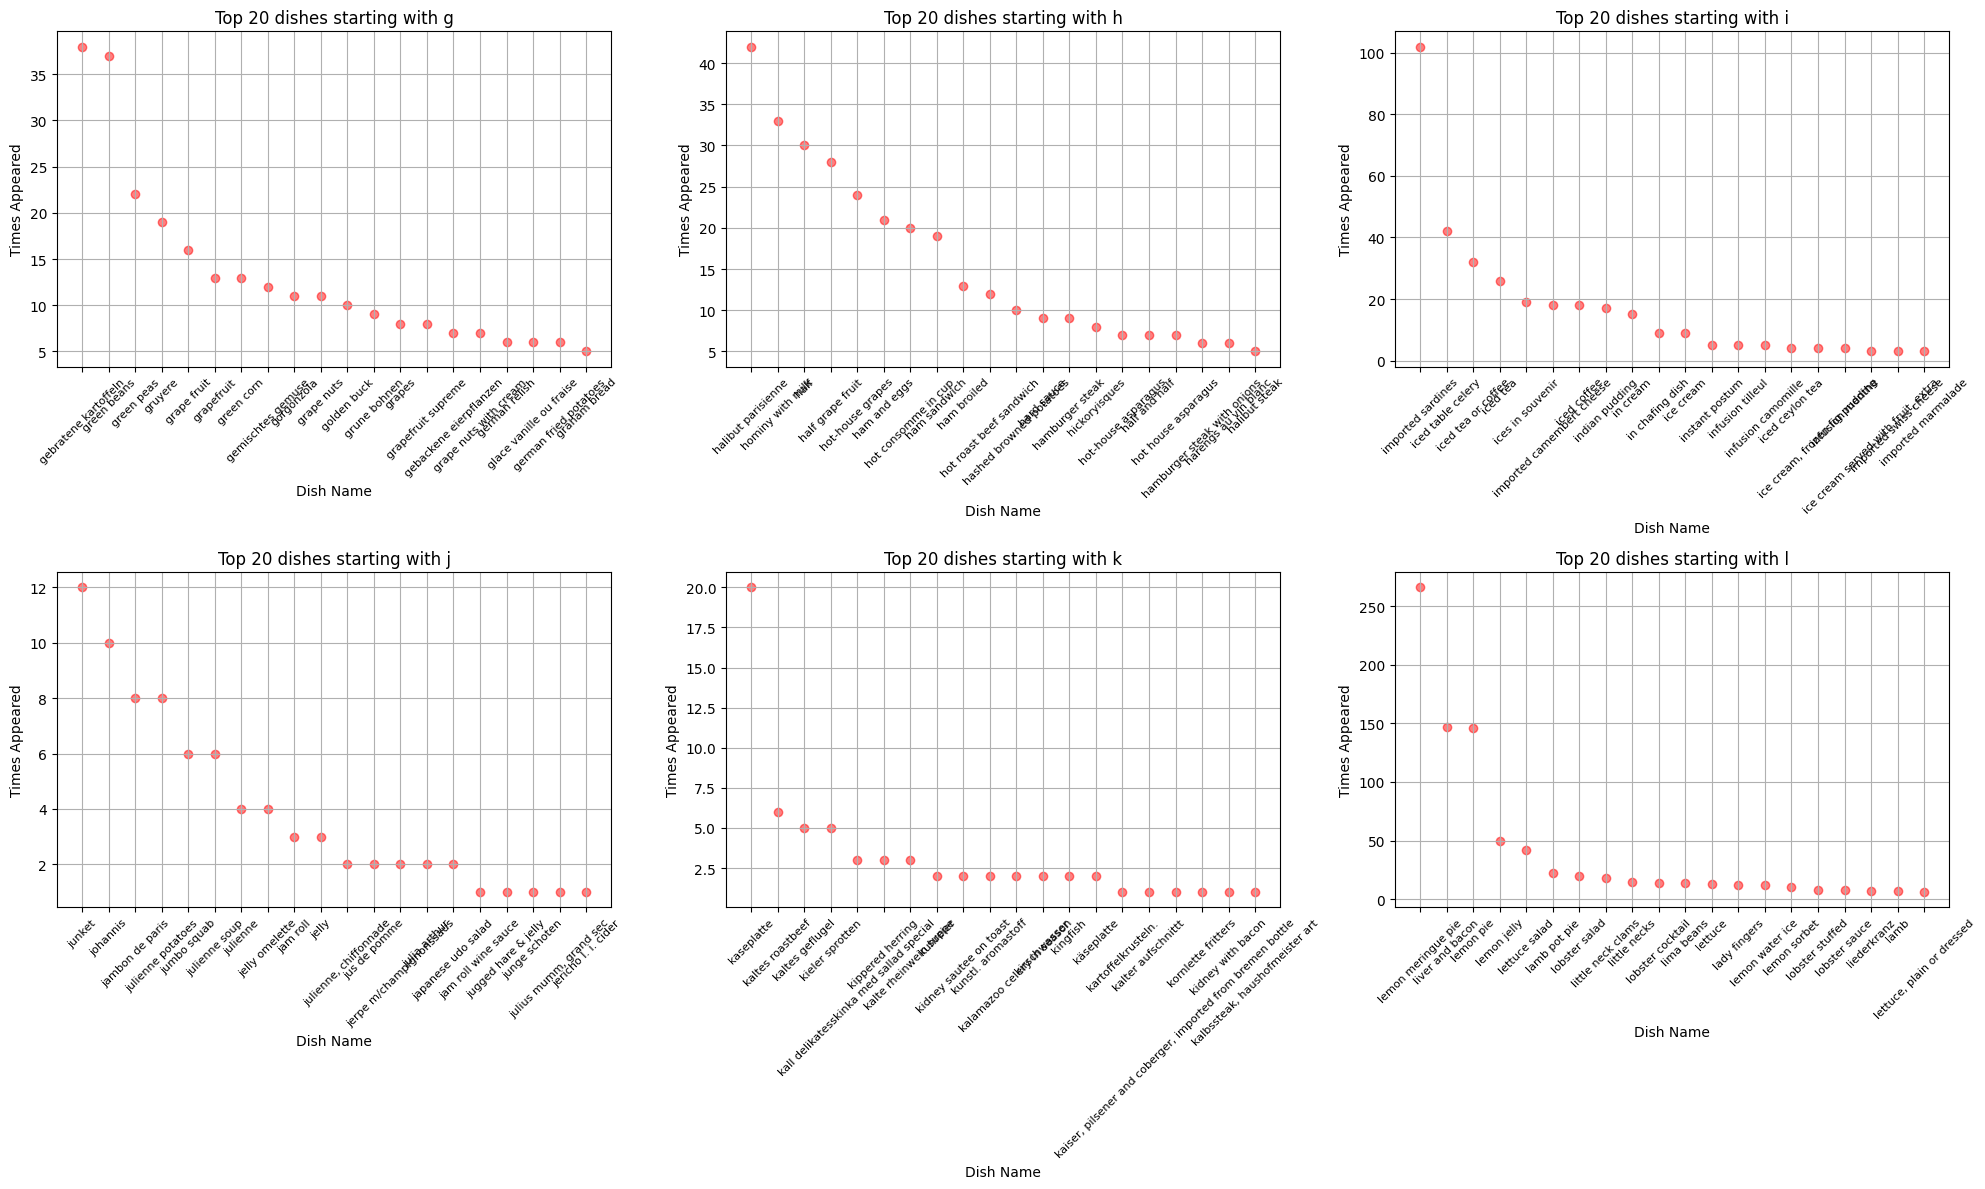

In [78]:
# dish['times_appeared'] = pd.to_numeric(dish['times_appeared'], errors='coerce')

# # Filter dishes whose names start with each letter of the alphabet
# filtered_dishes = {}
# for letter in 'ghijkl':
#     filtered_df = dish[dish['name'].str.startswith(letter)].dropna(subset=['times_appeared'])
#     top_20_names = filtered_df.nlargest(20, 'times_appeared')
#     filtered_dishes[letter] = top_20_names

# fig, axes = plt.subplots(2,3 , figsize=(20, 12))
# axes = axes.ravel()

# for i, (letter, df) in enumerate(filtered_dishes.items()):
#     titles = df['name'].str.lower()
#     times_appeared = df['times_appeared']
#     ax = axes[i]
#     ax.scatter(titles, times_appeared, color='red', alpha=0.5)
#     ax.set_title(f'Top 20 dishes starting with {letter}')
#     ax.set_xlabel('Dish Name')
#     ax.set_ylabel('Times Appeared')
#     ax.tick_params(axis='x', rotation=45, labelsize=8)
#     ax.grid(True)

# plt.tight_layout()
# plt.show()


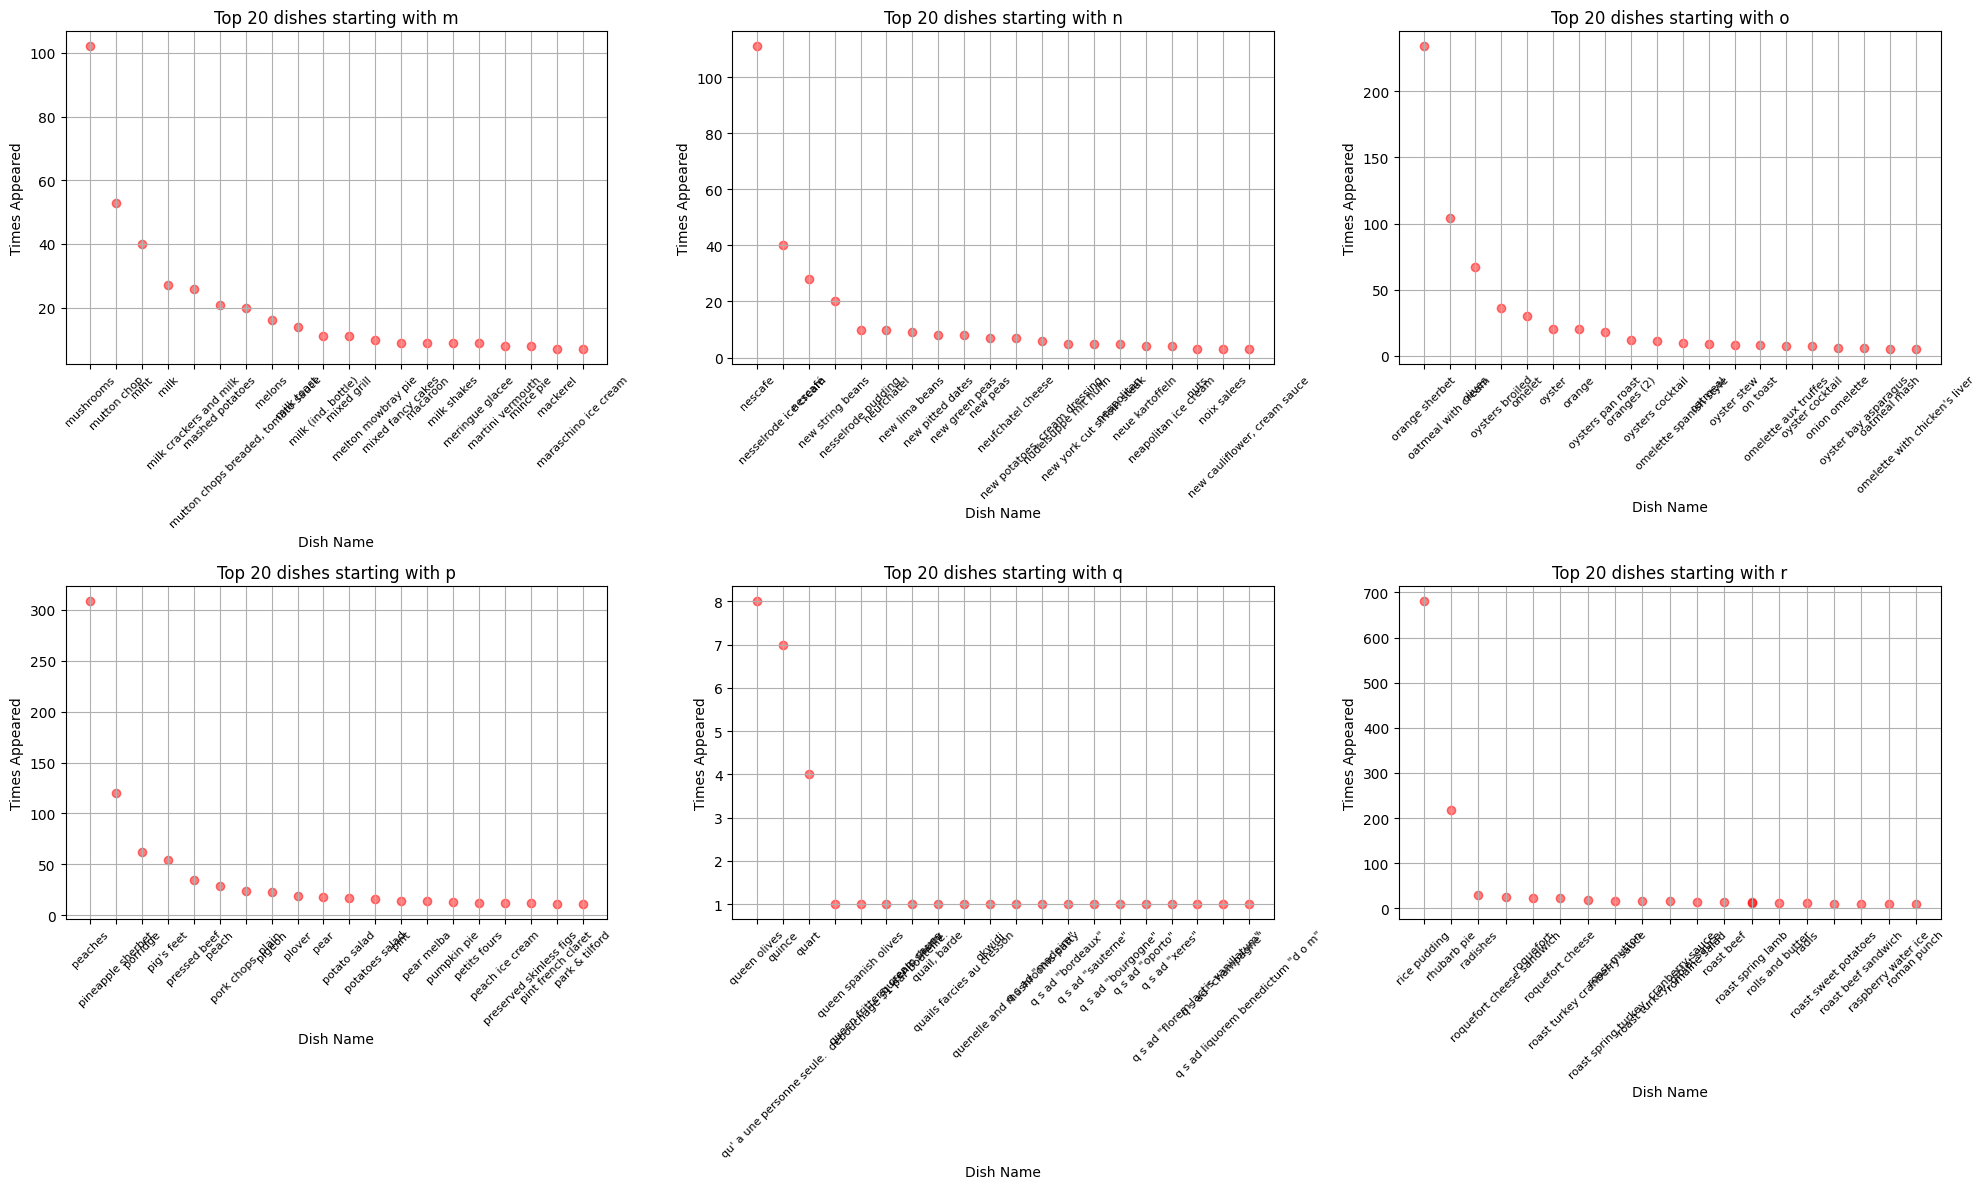

In [77]:
# dish['times_appeared'] = pd.to_numeric(dish['times_appeared'], errors='coerce')

# # Filter dishes whose names start with each letter of the alphabet
# filtered_dishes = {}
# for letter in 'mnopqr':
#     filtered_df = dish[dish['name'].str.startswith(letter)].dropna(subset=['times_appeared'])
#     top_20_names = filtered_df.nlargest(20, 'times_appeared')
#     filtered_dishes[letter] = top_20_names

# fig, axes = plt.subplots(2,3 , figsize=(20, 12))
# axes = axes.ravel()

# for i, (letter, df) in enumerate(filtered_dishes.items()):
#     titles = df['name'].str.lower()
#     times_appeared = df['times_appeared']
#     ax = axes[i]
#     ax.scatter(titles, times_appeared, color='red', alpha=0.5)
#     ax.set_title(f'Top 20 dishes starting with {letter}')
#     ax.set_xlabel('Dish Name')
#     ax.set_ylabel('Times Appeared')
#     ax.tick_params(axis='x', rotation=45, labelsize=8)
#     ax.grid(True)

# plt.tight_layout()
# plt.show()


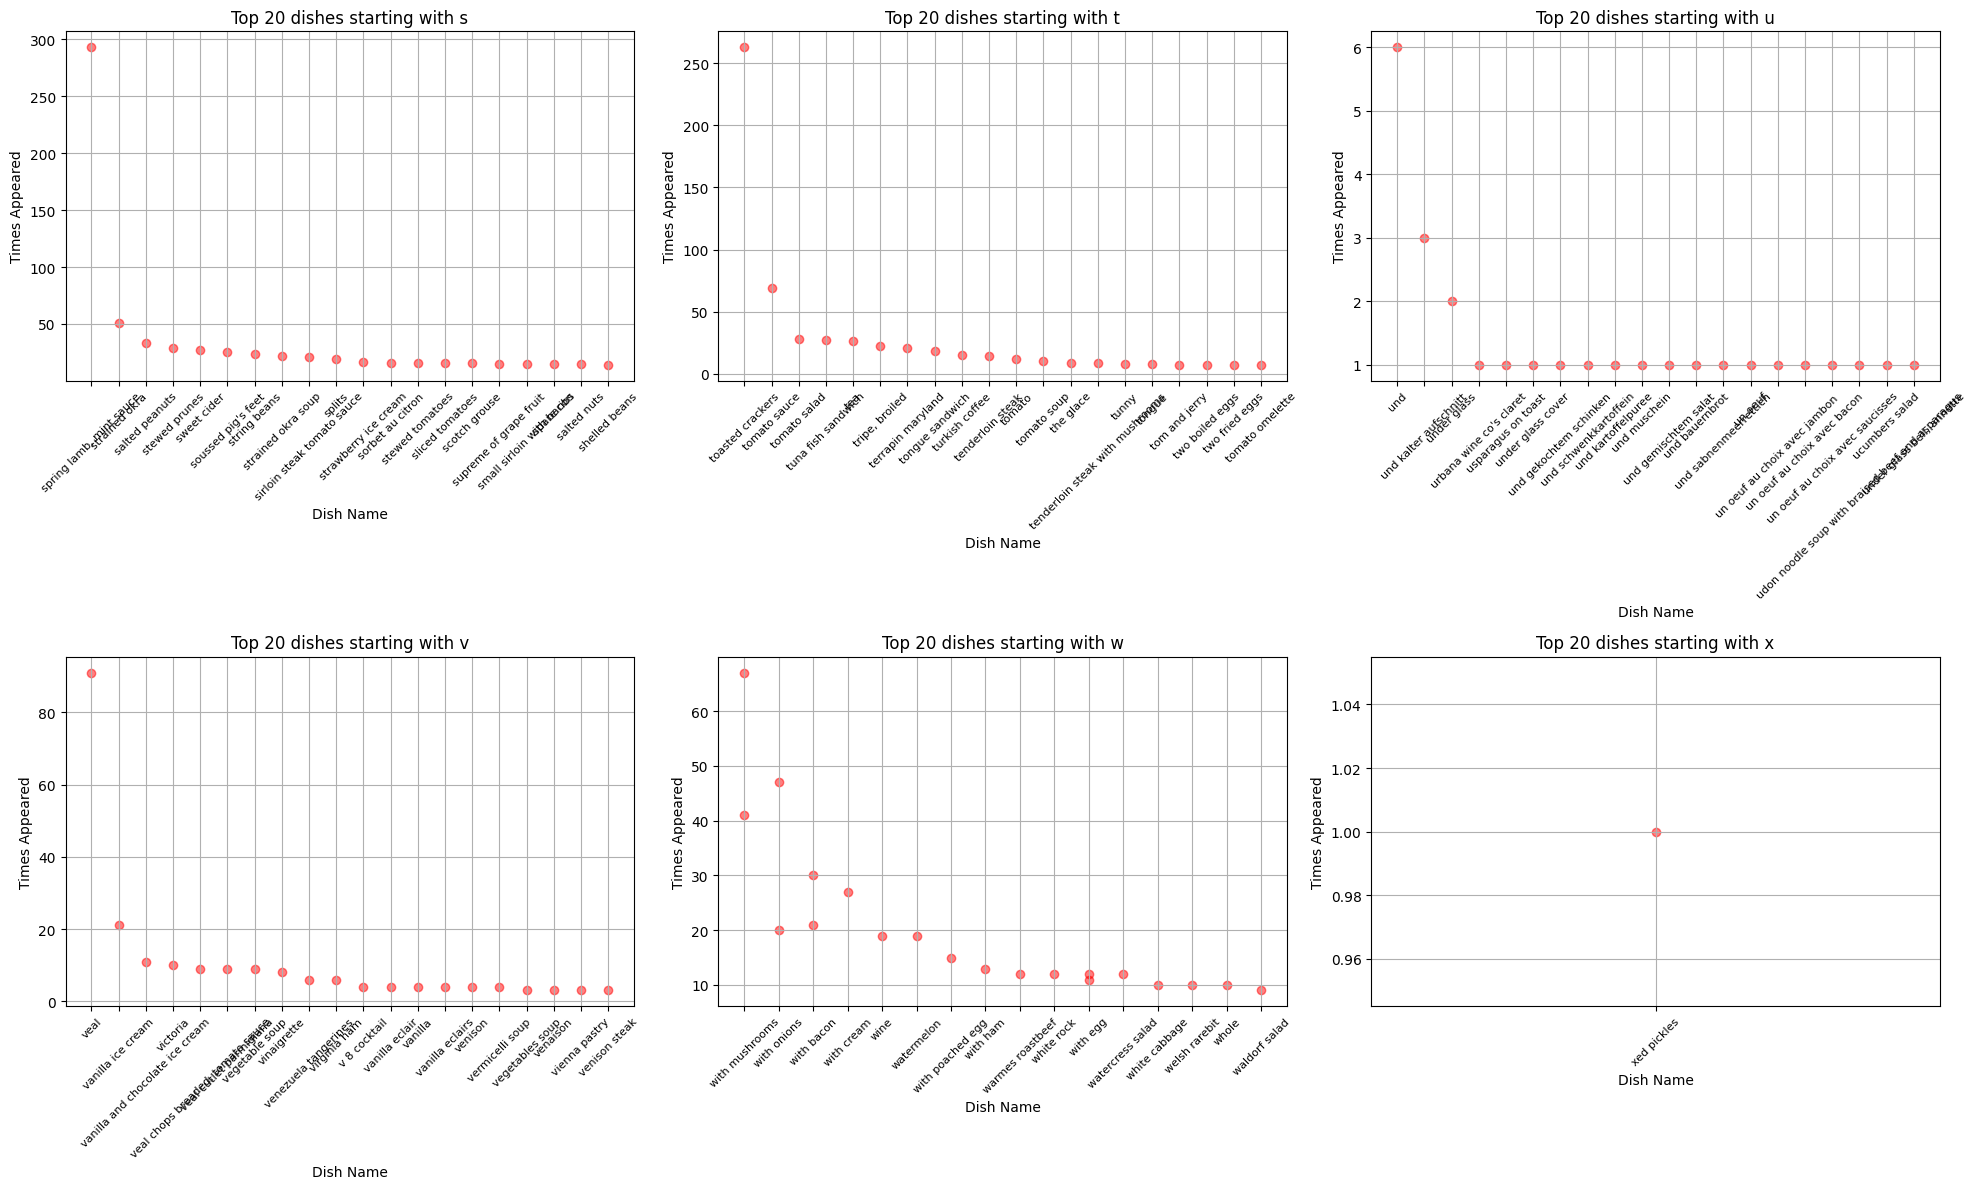

In [76]:
# dish['times_appeared'] = pd.to_numeric(dish['times_appeared'], errors='coerce')

# # Filter dishes whose names start with each letter of the alphabet
# filtered_dishes = {}
# for letter in 'stuvwx':
#     filtered_df = dish[dish['name'].str.startswith(letter)].dropna(subset=['times_appeared'])
#     top_20_names = filtered_df.nlargest(20, 'times_appeared')
#     filtered_dishes[letter] = top_20_names

# fig, axes = plt.subplots(2,3 , figsize=(20, 12))
# axes = axes.ravel()

# for i, (letter, df) in enumerate(filtered_dishes.items()):
#     titles = df['name'].str.lower()
#     times_appeared = df['times_appeared']
#     ax = axes[i]
#     ax.scatter(titles, times_appeared, color='RED', alpha=0.5)
#     ax.set_title(f'Top 20 dishes starting with {letter}')
#     ax.set_xlabel('Dish Name')
#     ax.set_ylabel('Times Appeared')
#     ax.tick_params(axis='x', rotation=45, labelsize=8)
#     ax.grid(True)

# plt.tight_layout()
# plt.show()


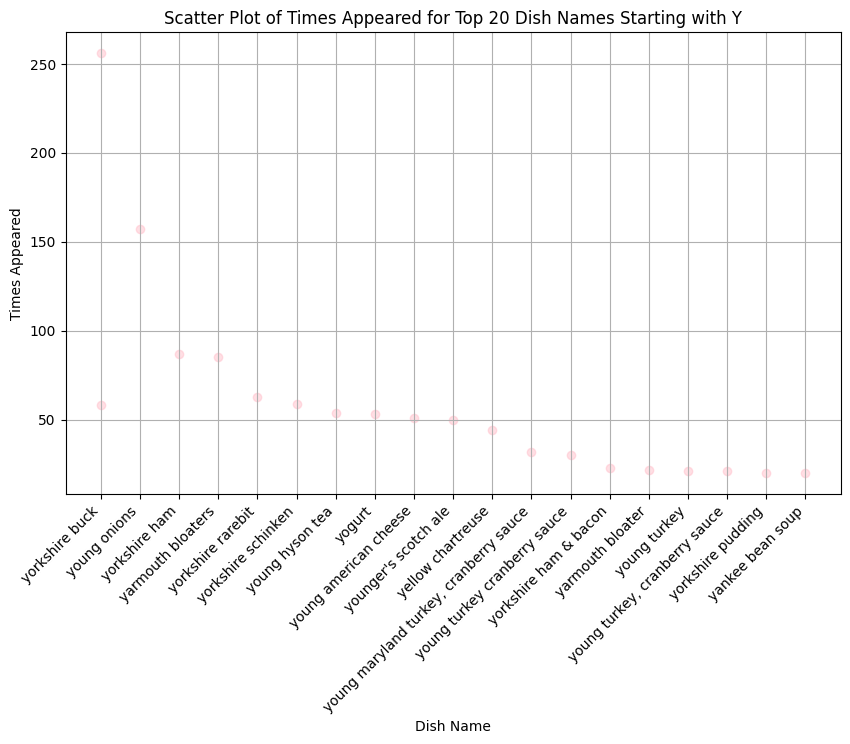

In [73]:
# dish['times_appeared'] = pd.to_numeric(dish['times_appeared'], errors='coerce')

# filtered_df = dish[dish['name'].str.startswith('Y')].dropna(subset=['times_appeared'])

# # Select the top 10 dishes based on the number of times appeared
# top_10_names_starting_with_Y = filtered_df.nlargest(20, 'times_appeared')

# # Extracting relevant columns
# titles = top_10_names_starting_with_Y['name'].str.lower()
# times_appeared = top_10_names_starting_with_Y['times_appeared']

# # Plotting the scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(titles, times_appeared, color='pink', alpha=0.5)
# plt.title('Scatter Plot of Times Appeared for Top 20 Dish Names Starting with Y')
# plt.xlabel('Dish Name')
# plt.ylabel('Times Appeared')
# plt.xticks(rotation=45, ha='right')  
# plt.grid(True)
# plt.show()

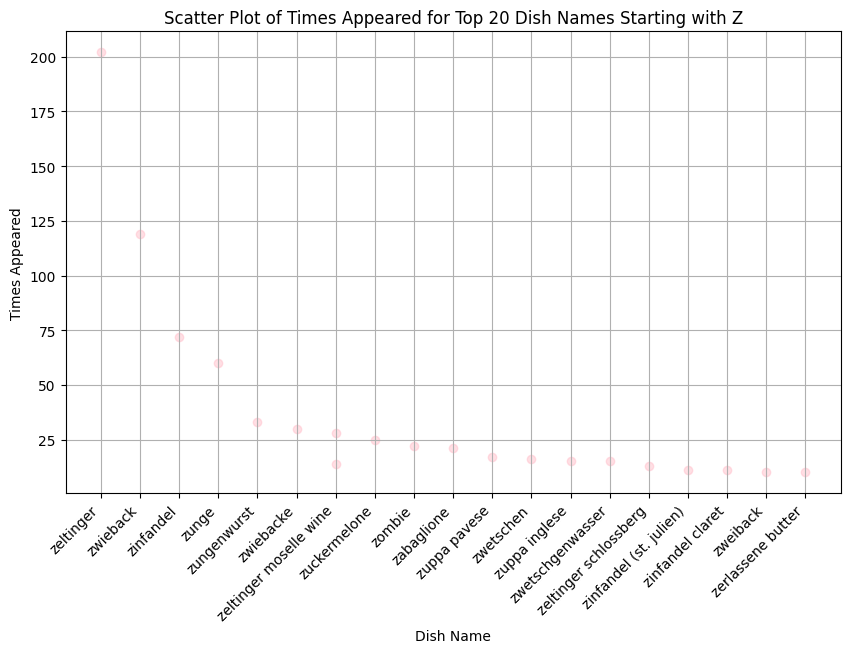

In [74]:
# dish['times_appeared'] = pd.to_numeric(dish['times_appeared'], errors='coerce')

# filtered_df = dish[dish['name'].str.startswith('Z')].dropna(subset=['times_appeared'])

# # Select the top 10 dishes based on the number of times appeared
# top_10_names_starting_with_z = filtered_df.nlargest(20, 'times_appeared')

# # Extracting relevant columns
# titles = top_10_names_starting_with_z['name'].str.lower()
# times_appeared = top_10_names_starting_with_z['times_appeared']

# # Plotting the scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(titles, times_appeared, color='pink', alpha=0.5)
# plt.title('Scatter Plot of Times Appeared for Top 20 Dish Names Starting with Z')
# plt.xlabel('Dish Name')
# plt.ylabel('Times Appeared')
# plt.xticks(rotation=45, ha='right')  
# plt.grid(True)
# plt.show()

***Looking at the change of number of dishes appear over time***

In [34]:
# dish = pd.read_csv('/Users/yusaeced/Desktop/data-foodmenu/Menus_Data/Dish.csv', na_values="", dtype=str)

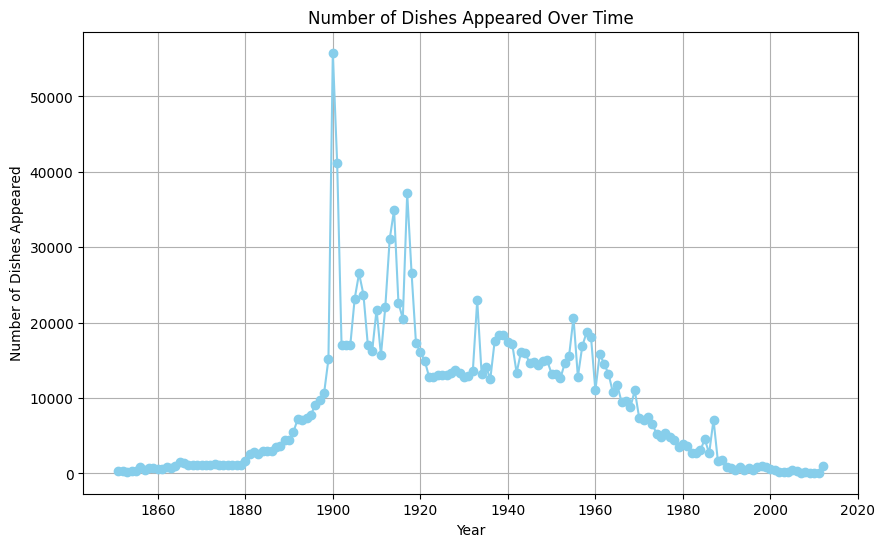

In [36]:
# dish['first_appeared'] = pd.to_datetime(dish['first_appeared'], errors='coerce', format='%Y')
# dish['last_appeared'] = pd.to_datetime(dish['last_appeared'], errors='coerce', format='%Y')

# # Drop rows with missing or invalid dates
# dish = dish.dropna(subset=['first_appeared', 'last_appeared'])

# # Ranges
# min_year = dish['first_appeared'].dt.year.min()
# max_year = dish['last_appeared'].dt.year.max()
# years_range = range(min_year, max_year + 1)
# time_series_data = pd.Series(index=years_range)
# for year in years_range:
#     time_series_data[year] = ((df['first_appeared'].dt.year <= year) & (df['last_appeared'].dt.year >= year)).sum()

# # Time Series
# plt.figure(figsize=(10, 6))
# time_series_data.plot(marker='o', color='skyblue', linestyle='-')
# plt.title('Number of Dishes Appeared Over Time')
# plt.xlabel('Year')
# plt.ylabel('Number of Dishes Appeared')
# plt.grid(True)
# plt.show()

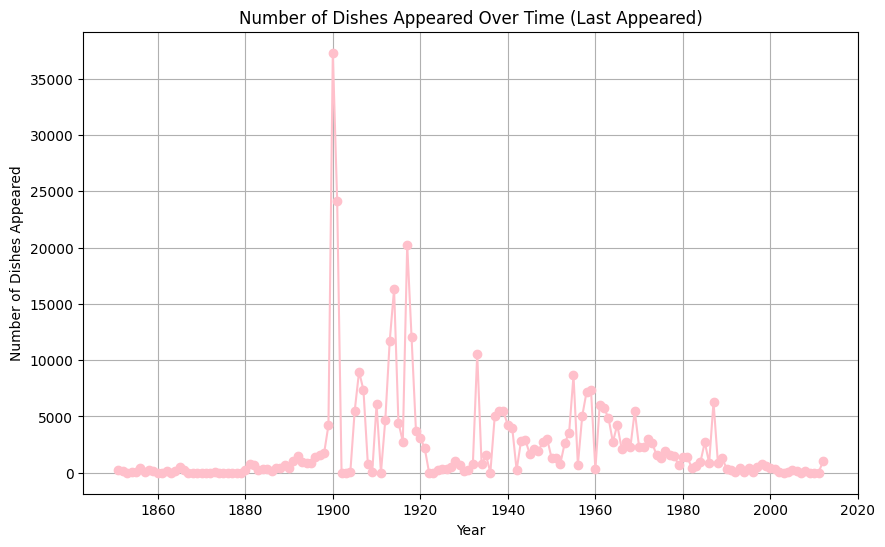

In [37]:
# dish['last_appeared'] = pd.to_datetime(dish['last_appeared'], errors='coerce', format='%Y')

# # Drop rows with missing or invalid dates
# dish = dish.dropna(subset=['last_appeared'])

# # Extract the range of years from 'last_appeared' column & define it
# min_year = dish['last_appeared'].dt.year.min()
# max_year = dish['last_appeared'].dt.year.max()
# years_range = range(min_year, max_year + 1)

# # Count the number of dishes appeared each year based on 'last_appeared'
# time_series_data = pd.Series(index=years_range)
# for year in years_range:
#     time_series_data[year] = (dish['last_appeared'].dt.year == year).sum()

# #Time Series
# plt.figure(figsize=(10, 6))
# time_series_data.plot(marker='o', color='pink', linestyle='-')
# plt.title('Number of Dishes Appeared Over Time (Last Appeared)')
# plt.xlabel('Year')
# plt.ylabel('Number of Dishes Appeared')
# plt.grid(True)
# plt.show()

***Looking at the frequency of Dish Count of Menus***

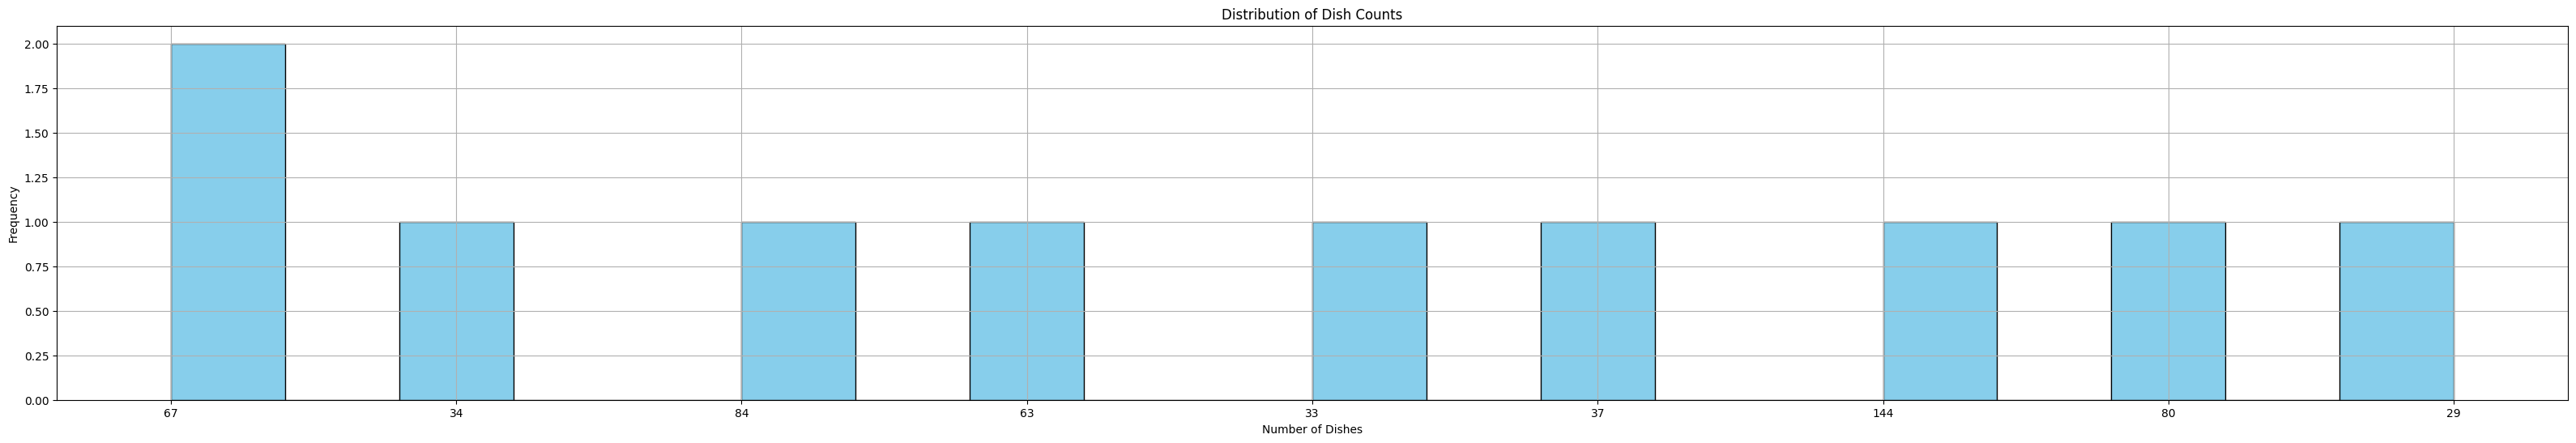

In [12]:
# dish_counts = menu['dish_count']

# # Plotting the histogram
# plt.figure(figsize=(40, 6))
# plt.hist(dish_counts.head(10), bins=20, color='skyblue', edgecolor='black')
# plt.title('Distribution of Dish Counts')
# plt.xlabel('Number of Dishes')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

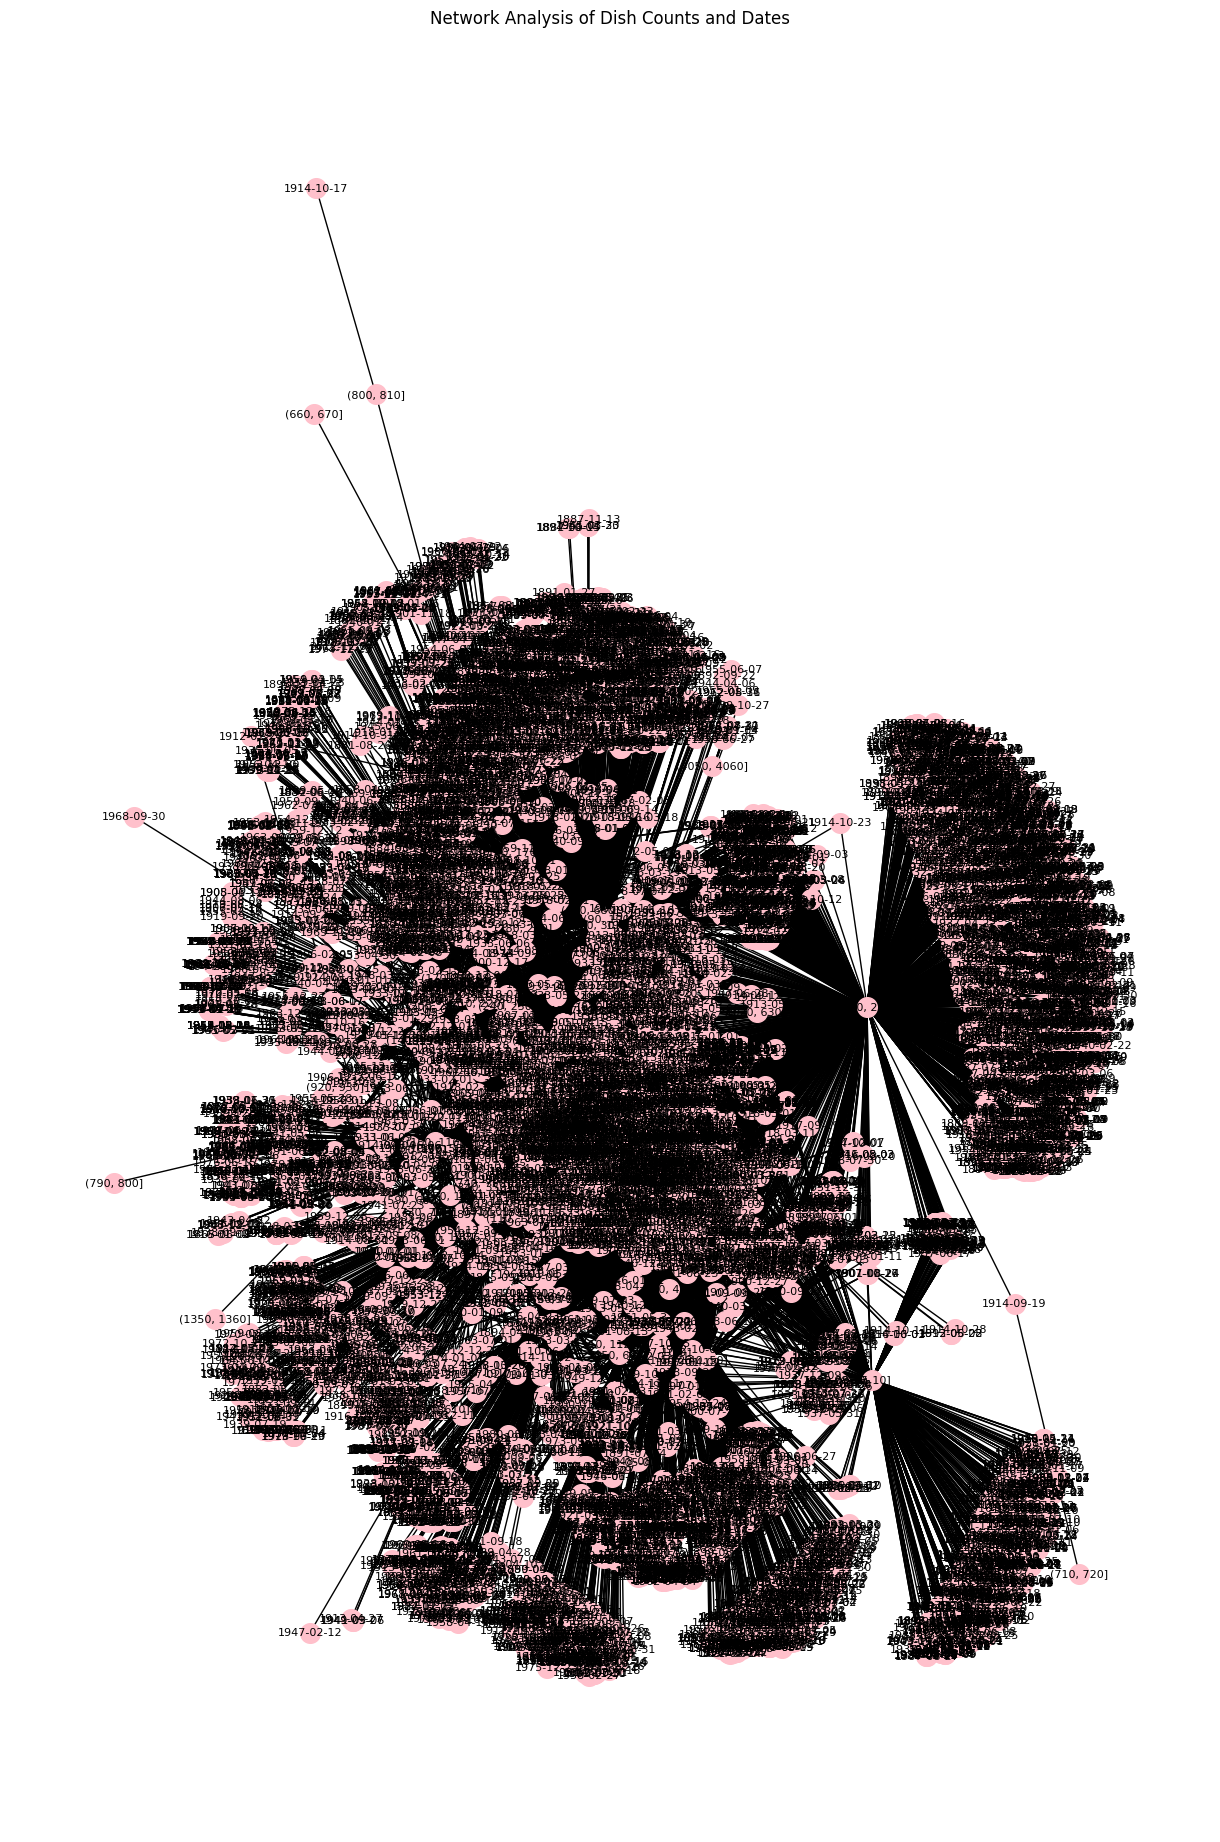

In [24]:
# menu = menu[menu['date'] != '1907-12-01']
# data = menu[['date', 'dish_count']]

# data['date'] = data['date'].astype(str)
# data['dish_count'] = data['dish_count'].astype(str)

# # Grouping dish counts into categories
# data['dish_count_category'] = pd.cut(data['dish_count'].astype(int), bins=range(0, max(data['dish_count'].astype(int)) + 100, 10)).astype(str)

# # Creating a graph
# G = nx.Graph()

# # Adding nodes (dates and dish count categories)
# G.add_nodes_from(data['date'], bipartite=0)
# G.add_nodes_from(data['dish_count_category'], bipartite=1)

# # Adding edges between dates and dish count categories
# for index, row in data.iterrows():
#     G.add_edge(row['date'], row['dish_count_category'])

# # Plotting the network
# plt.figure(figsize=(12, 18))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=200, node_color='pink', font_size=8, )
# plt.title('Network Analysis of Dish Counts and Dates')
# plt.show()

***Looking at the frequency of specific ingredients***

To define variables with respect to particular ingredients, we'll create an exploded version of the recipes dataframe by expanding the column containing lists of ingredient IDs into individual rows, each referring to a specific ingredient in a specific recipe; however, before doing this, we need to convert the contents of the ingredient IDs field from strings representing lists to actual lists.

In [77]:
# recipes_exploded = recipes.copy(deep=True)
# recipes_exploded["ingredient_ids"] = recipes_exploded['ingredient_ids'].apply(lambda x : ast.literal_eval(x))
# recipes_exploded = recipes_exploded.explode(column="ingredient_ids", ignore_index=True)
# recipes_exploded.head(10)

recipe_id                                name   submitted ingredient_ids  \
0     424415  aromatic basmati rice  rice cooker  2010-05-10            389   
1     424415  aromatic basmati rice  rice cooker  2010-05-10           7655   
2     424415  aromatic basmati rice  rice cooker  2010-05-10           6270   
3     424415  aromatic basmati rice  rice cooker  2010-05-10           1527   
4     424415  aromatic basmati rice  rice cooker  2010-05-10           3406   
5     146223               pumpkin pie a la easy  2005-11-25           2683   
6     146223               pumpkin pie a la easy  2005-11-25           4969   
7     146223               pumpkin pie a la easy  2005-11-25            800   
8     146223               pumpkin pie a la easy  2005-11-25           5298   
9     146223               pumpkin pie a la easy  2005-11-25            840   

                                         ingredients  n_ingredients  
0  ['basmati rice', 'water', 'salt', 'cinnamon st...              5  
1  ['basmati rice', 'water', 'salt', 'cinnamon st...              5  
2  ['basmati rice', 'water', 'salt', 'cinnamon st...              5  
3  ['basmati rice', 'water', 'salt', 'cinnamon st...              5  
4  ['basmati rice', 'water', 'salt', 'cinnamon st...              5  
5  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12  
6  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12  
7  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12  
8  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12  
9  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12

In [78]:
# ingr_df["num_recipes"] = ingr_df["ingr_id"].map(dict(recipes_exploded.groupby("ingredient_ids")["recipe_id"].size()))
# ingr_df.head(10)

ingr_id                                   ingr_name  num_recipes
0     4308                                     lettuce       4294.0
1     2744  french vanilla pudding and pie filling mix          4.0
2     6843                      stove top stuffing mix        106.0
3     1910                                cream cheese       8966.0
4     1168                                     cheddar      12300.0
5     5811                                   radicchio         83.0
6     5205                                 pasta sauce        412.0
7     7233                                tomato sauce       3637.0
8     6482                       shredded three cheese          NaN
9     4836                                  mozzarella       4878.0

In [79]:
# total_number_of_recipes = recipes["recipe_id"].unique().size
# ingr_df["frequency"] = ingr_df["num_recipes"]/total_number_of_recipes
# ingr_df.head(10)

ingr_id                                   ingr_name  num_recipes  frequency
0     4308                                     lettuce       4294.0   0.024088
1     2744  french vanilla pudding and pie filling mix          4.0   0.000022
2     6843                      stove top stuffing mix        106.0   0.000595
3     1910                                cream cheese       8966.0   0.050296
4     1168                                     cheddar      12300.0   0.068998
5     5811                                   radicchio         83.0   0.000466
6     5205                                 pasta sauce        412.0   0.002311
7     7233                                tomato sauce       3637.0   0.020402
8     6482                       shredded three cheese          NaN        NaN
9     4836                                  mozzarella       4878.0   0.027364

In [80]:
# #Some of the ingredients in this dataframe, drop them!

# ingr_df = ingr_df.dropna()
# ingr_df.head(10)

ingr_id                                   ingr_name  num_recipes  \
0      4308                                     lettuce       4294.0   
1      2744  french vanilla pudding and pie filling mix          4.0   
2      6843                      stove top stuffing mix        106.0   
3      1910                                cream cheese       8966.0   
4      1168                                     cheddar      12300.0   
5      5811                                   radicchio         83.0   
6      5205                                 pasta sauce        412.0   
7      7233                                tomato sauce       3637.0   
9      4836                                  mozzarella       4878.0   
10      912                                    cake mix       2344.0   

    frequency  
0    0.024088  
1    0.000022  
2    0.000595  
3    0.050296  
4    0.068998  
5    0.000466  
6    0.002311  
7    0.020402  
9    0.027364  
10   0.013149

In [81]:
# threshold = 5
# rare_ingredients = ingr_df.loc[ingr_df["num_recipes"] <= threshold, "ingr_id"].values
# recipes_exploded["rare_ingr"] = recipes_exploded["ingredient_ids"].map(lambda x: x in rare_ingredients)
# recipes_exploded.head(10)

recipe_id                                name   submitted ingredient_ids  \
0     424415  aromatic basmati rice  rice cooker  2010-05-10            389   
1     424415  aromatic basmati rice  rice cooker  2010-05-10           7655   
2     424415  aromatic basmati rice  rice cooker  2010-05-10           6270   
3     424415  aromatic basmati rice  rice cooker  2010-05-10           1527   
4     424415  aromatic basmati rice  rice cooker  2010-05-10           3406   
5     146223               pumpkin pie a la easy  2005-11-25           2683   
6     146223               pumpkin pie a la easy  2005-11-25           4969   
7     146223               pumpkin pie a la easy  2005-11-25            800   
8     146223               pumpkin pie a la easy  2005-11-25           5298   
9     146223               pumpkin pie a la easy  2005-11-25            840   

                                         ingredients  n_ingredients  rare_ingr  
0  ['basmati rice', 'water', 'salt', 'cinnamon st...              5      False  
1  ['basmati rice', 'water', 'salt', 'cinnamon st...              5      False  
2  ['basmati rice', 'water', 'salt', 'cinnamon st...              5      False  
3  ['basmati rice', 'water', 'salt', 'cinnamon st...              5      False  
4  ['basmati rice', 'water', 'salt', 'cinnamon st...              5      False  
5  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12      False  
6  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12      False  
7  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12      False  
8  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12      False  
9  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12      False

In [82]:
# recipes["num_rare_ingr"] = recipes["recipe_id"].map(dict(recipes_exploded.groupby("recipe_id")["rare_ingr"].sum()))
# recipes.head(10)

recipe_id                                          name   submitted  \
0     424415            aromatic basmati rice  rice cooker  2010-05-10   
1     146223                         pumpkin pie a la easy  2005-11-25   
2     312329              cheesy tomato soup with potatoes  2008-07-07   
3      74301                                    mini tacos  2003-10-29   
4      76272                      rosemary s hanky panky s  2003-11-12   
5     465171  pink bavarian crown strawberry dream supreme  2011-09-29   
6     163861           tom and kelly s chicken fried steak  2006-04-11   
7     186383                     chocolate oat cookie bars  2006-09-15   
8     116395                     tropical lemon cream bars  2005-04-12   
9     303460             jeera on cubes  barbecue marinade  2008-05-13   

                                      ingredient_ids  \
0                      [389, 7655, 6270, 1527, 3406]   
1  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...   
2  [1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...   
3   [7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]   
4                            [3484, 6324, 7594, 243]   
5  [6861, 7655, 6846, 6906, 1789, 131, 6863, 1833...   
6  [5574, 2683, 6270, 5319, 2499, 869, 1278, 4987...   
7  [2683, 4969, 332, 335, 6270, 800, 4987, 7470, ...   
8  [2683, 1689, 5687, 1098, 840, 7782, 7011, 1910...   
9  [6413, 7997, 3148, 3710, 1799, 2007, 3203, 265...   

                                         ingredients  n_ingredients  \
0  ['basmati rice', 'water', 'salt', 'cinnamon st...              5   
1  ['flour', 'oats', 'brown sugar', 'pecans', 'bu...             12   
2  ['chicken broth', 'water', 'salt', 'black pepp...             15   
3  ['wonton wrappers', 'hamburger', 'taco seasoni...              8   
4  ['ground beef', 'ground sausage', 'velveeta ch...              4   
5  ['strawberry jell-o gelatin dessert', 'water',...             10   
6  ['boneless pork chops', 'flour', 'salt', 'pepp...              9   
7  ['flour', 'oats', 'baking powder', 'baking sod...             10   
8  ['flour', "confectioners' sugar", 'powdered mi...             13   
9  ['sesame oil', 'yoghurt', 'fruit vinegar', 'ho...              9   

   num_rare_ingr  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              1

Ingredient Prediction with a Naive Bayes Model

In [98]:
# recipes_exploded_wrt_name_tokens = recipes.copy(deep=True)
# recipes_exploded_wrt_name_tokens["name_tokens"] = recipes_exploded_wrt_name_tokens["name"].map(lambda x: x.split())
# recipes_exploded_wrt_name_tokens = recipes_exploded_wrt_name_tokens.explode(column="name_tokens", ignore_index=True)
# recipes_exploded_wrt_name_tokens = recipes_exploded_wrt_name_tokens[["recipe_id", "name_tokens", "ingredient_ids"]]
# recipes_exploded_wrt_name_tokens.head(10)

recipe_id name_tokens                                     ingredient_ids
0     424415    aromatic                      [389, 7655, 6270, 1527, 3406]
1     424415     basmati                      [389, 7655, 6270, 1527, 3406]
2     424415        rice                      [389, 7655, 6270, 1527, 3406]
3     424415        rice                      [389, 7655, 6270, 1527, 3406]
4     424415      cooker                      [389, 7655, 6270, 1527, 3406]
5     146223     pumpkin  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...
6     146223         pie  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...
7     146223           a  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...
8     146223          la  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...
9     146223        easy  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...

In [99]:
# recipes_exploded_wrt_name_tokens["ingredient_ids"] = recipes_exploded_wrt_name_tokens['ingredient_ids'].apply(lambda x : ast.literal_eval(x))
# recipes_exploded_wrt_name_tokens = recipes_exploded_wrt_name_tokens.explode(column="ingredient_ids", ignore_index=True)
# recipes_exploded_wrt_name_tokens.head(10)

recipe_id name_tokens ingredient_ids
0     424415    aromatic            389
1     424415    aromatic           7655
2     424415    aromatic           6270
3     424415    aromatic           1527
4     424415    aromatic           3406
5     424415     basmati            389
6     424415     basmati           7655
7     424415     basmati           6270
8     424415     basmati           1527
9     424415     basmati           3406

In [101]:
# ingredient_id_to_prob = dict(zip(ingr_df["ingr_id"].values, ingr_df["frequency"]))

In [102]:
# name_token_and_ingredient_id_to_counts = dict(recipes_exploded_wrt_name_tokens.groupby("name_tokens")["ingredient_ids"].value_counts())
# name_token_to_count = dict(recipes_exploded_wrt_name_tokens.groupby("name_tokens").size())

In [103]:
# name_token_and_ingredient_id_to_prob = lambda name_token,ingr_id: (name_token_and_ingredient_id_to_counts.get((name_token,ingr_id), 0)+1)/name_token_to_count[name_token]
# name_token_and_ingredient_id_to_prob("beef", 1685)

0.000601229179656186

### Analysis 2: 
The key challenge assoicated with extracting and analyzing historic menus is caused by their inherent factors such as the language and the format. As our dataset consists of values that are added through different periods, and is open-source. Therefore, same dish names can represent themselves in differet manners. 
To mitigate the errors caused by repetition of dishes, avoiding mismatchs between external datasets' representation of the same dish names we can compare the dishes based on their similarity scores. 

In [46]:
# # getting all unique dish name values from respective datasets 
# food_names_1_values = food_names_1['FOOD NAME'].unique()
# food_names_2_values = food_names_2['dish_name'].unique()
# vegan_dishes_values = vegan_dishes['title'].unique()
# # to speed up the process
# top_food_names_1_values = food_names_1['FOOD NAME'].value_counts().head(10).index
# top_food_names_2_values = food_names_2['dish_name'].value_counts().head(10).index

In [49]:
# #Sort unique food names
# vegan_dishes_values = sorted(vegan_dishes_values)

# # Dictionary to store the first value of each letter
# first_values_by_letter = {}

# # Get the first character of the name and convert it to uppercase
# for name in food_names_1_values:
#     first_letter = name[1].lower()
#     # If the first letter is not already in the dictionary, add it along with its corresponding value
#     if first_letter not in first_values_by_letter:
#         first_values_by_letter[first_letter] = name

# # Convert the dictionary values to a list
# first_values = list(first_values_by_letter.values())
# first_values


['Angelica',
 'Savoy cabbage',
 'Silver linden
 'Allium (Onion)',
 'Leek',
 'Chives',
 'Custard apple',
 'Horseradish',
 'Asparagus',
 'Star fruit',
 'Brazil nut',
 'Swede',
 'Hyssop',
 'Apple',
 'Evening primrose',
 'Scarlet bean',
 'Eggplant',
 'Small-leaf linden',
 'Adzuki bean',
 'Oxheart cabbage',
 'Skunk currant',
 'Abalone',
 'Squashberry']

In [55]:
# #Sort unique food names
# food_names_1_values = sorted(food_names_1_values)

# # Dictionary to store the first value of each letter
# first_values_by_letter = {}

# # Get the first character of the name and convert it to uppercase
# for name in food_names_1_values:
#     first_letter = name[0].upper()
#     # If the first letter is not already in the dictionary, add it along with its corresponding value
#     if first_letter not in first_values_by_letter:
#         first_values_by_letter[first_letter] = name

# # Convert the dictionary values to a list
# first_values = list(first_values_by_letter.values())
# first_values

['Abalone',
 'Babassu palm',
 'Cabbage',
 'Daikon radish',
 'Eastern oyster',
 'Falafel',
 'Gadiformes (Cod, Hake)',
 'Haddock',
 'Ice cream',
 'Jackfruit',
 'Kai-lan',
 'Lake trout',
 'Macadamia nut',
 'Nachos',
 'Oat',
 'Pacific cod',
 'Quail',
 'Rabbit',
 'Sablefish',
 'Taco',
 'Ucuhuba',
 'Vaccinium (Blueberry, Cranberry, Huckleberry)',
 'Waffle',
 'Yam',
 'Zwieback']

['Abalone',
 'Babassu palm',
 'Cabbage',
 'Daikon radish',
 'Eastern oyster',
 'Falafel',
 'Gadiformes (Cod, Hake)',
 'Haddock',
 'Ice cream',
 'Jackfruit',
 'Kai-lan',
 'Lake trout',
 'Macadamia nut',
 'Nachos',
 'Oat',
 'Pacific cod',
 'Quail',
 'Rabbit',
 'Sablefish',
 'Taco',
 'Ucuhuba',
 'Vaccinium (Blueberry, Cranberry, Huckleberry)',
 'Waffle',
 'Yam',
 'Zwieback']

In [48]:
# # Create the header 
# print("Profile Dish")

# # Counts the number of null values in the 'name' column of the 'dish' dataset.
# column_name = 'name'
# null_values_count = dish[column_name].isnull().sum()

# # Prints the count of null values in the 'name' column.
# print("Count of Null Values in Name Column:".format(column_name), null_values_count)

# # Counts the number of values in the 'name' column that have a length of 1 character.
# single_char_count = dish[dish[column_name].str.len() == 1].shape[0]

# # Prints the count of values with a length of 1 character in the 'name' column.
# print("Number of Values with length of 1 in Name Column:".format(column_name), single_char_count)

# # Function to find similar strings in a list of strings based on a similarity threshold.
# def find_similar_strings(string, search_list, threshold=80):
#     similar_strings = []
#     # Iterate through each item in the search list.
#     for item in search_list:
#         # Calculate the similarity score between the input string and the current item. 
#         similarity_score = fuzz.ratio(string, item)
#         # If the similarity score is above or equal to the threshold, add the item to the list of similar strings.
#         if similarity_score >= threshold:
#             similar_strings.append((item, similarity_score))
#     return similar_strings

Profile Dish
Count of Null Values in Name Column: 0
Number of Values with length of 1 in Name Column: 19


Profile Dish
Count of Null Values in Name Column: 0
Number of Values with length of 1 in Name Column: 19

In [36]:
# #Similarity Check with the food_names_1 dataset from https://data.world/foodiee/add-flow/workspace/file?filename=Only+Dishes
# food_names_1_values = food_names_1['FOOD NAME'].unique()
# for string in food_names_1_values:
#     similar_strings_1 = find_similar_strings(string, dish['name'].unique())
#     print(string)
#     for item, similarity_score in similar_strings_1:
#         print(f"String: {string}, Similar: {item}, Similarity Score: {similarity_score}")

# #Similarity Check with the food_names_2 dataset from https://data.world/alexandra/generic-food-database/workspace/file?filename=generic-food.csv
# food_names_2_values = food_names_2['FOOD NAME'].unique()
# for string in food_names_2_values:
#     similar_strings_2 = find_similar_strings(string, dish['name'].unique())
#     print(string)
#     for item, similarity_score in similar_strings_2:
#         print(f"String: {string}, Similar: {item}, Similarity Score: {similarity_score}")


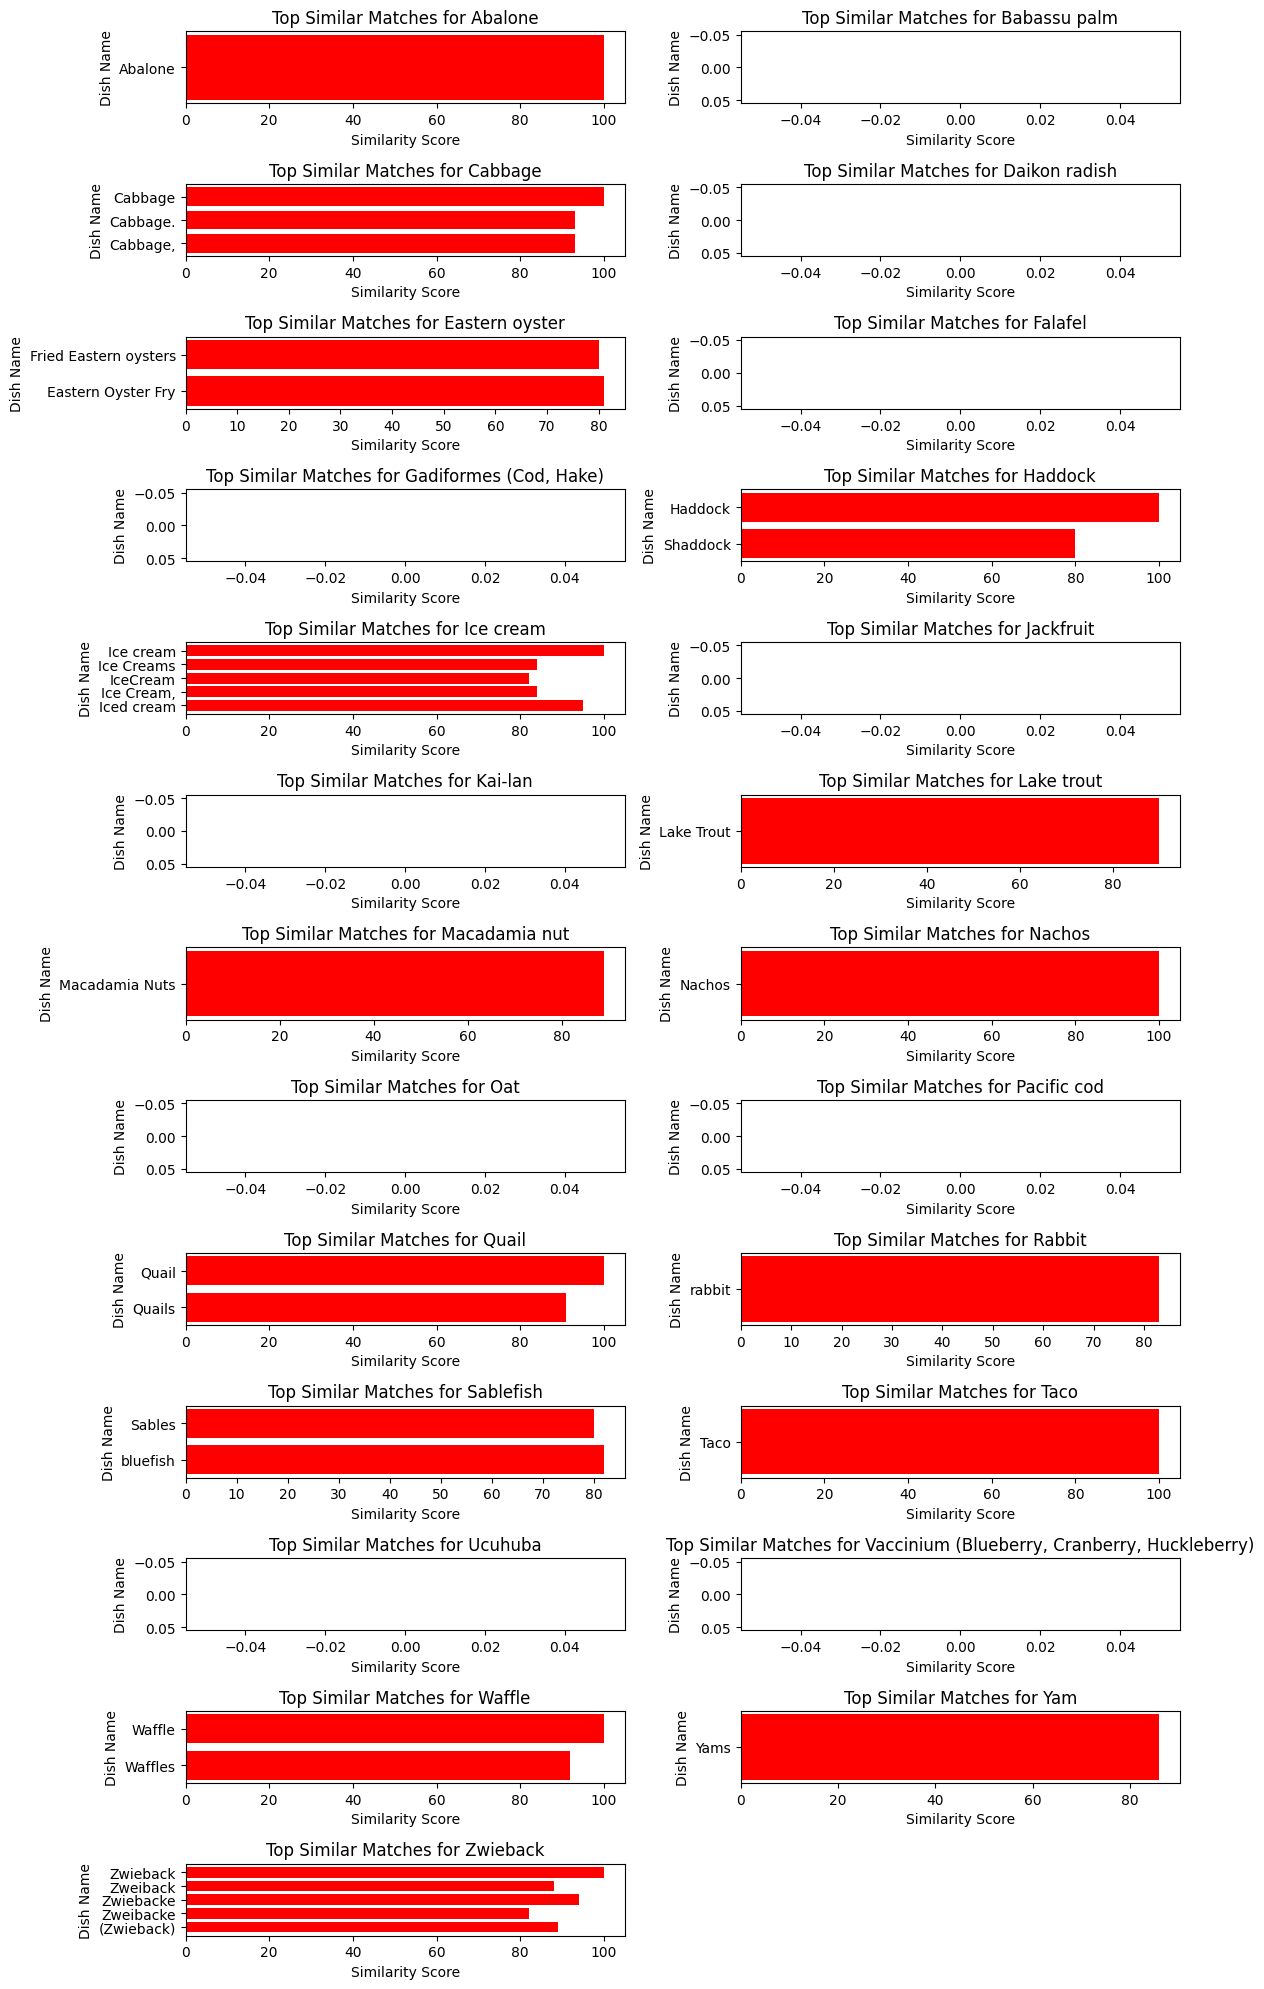

In [78]:
# # a dictionary to store top similar matches for each food name
# top_similar_matches = {}

# # Filling  with top similar matches
# for string in first_values:
#     similar_strings = find_similar_strings(string, dish['name'].unique())
#     top_similar_matches[string] = similar_strings[:5]  # Adjust to show top N similar matches

# # Plotting the top similar matches for each food name
# plt.figure(figsize=(12, 20))
# for i, (food_name, similar_matches) in enumerate(top_similar_matches.items()):
#     plt.subplot(13, 2, i+1)  
#     similar_names = [match[0] for match in similar_matches]
#     similarity_scores = [match[1] for match in similar_matches]
#     plt.barh(similar_names, similarity_scores, color='red')
#     plt.xlabel('Similarity Score')
#     plt.ylabel('Dish Name')
#     plt.title(f'Top Similar Matches for {food_name}')
#     plt.gca().invert_yaxis()  
#     plt.tight_layout()

# plt.show()


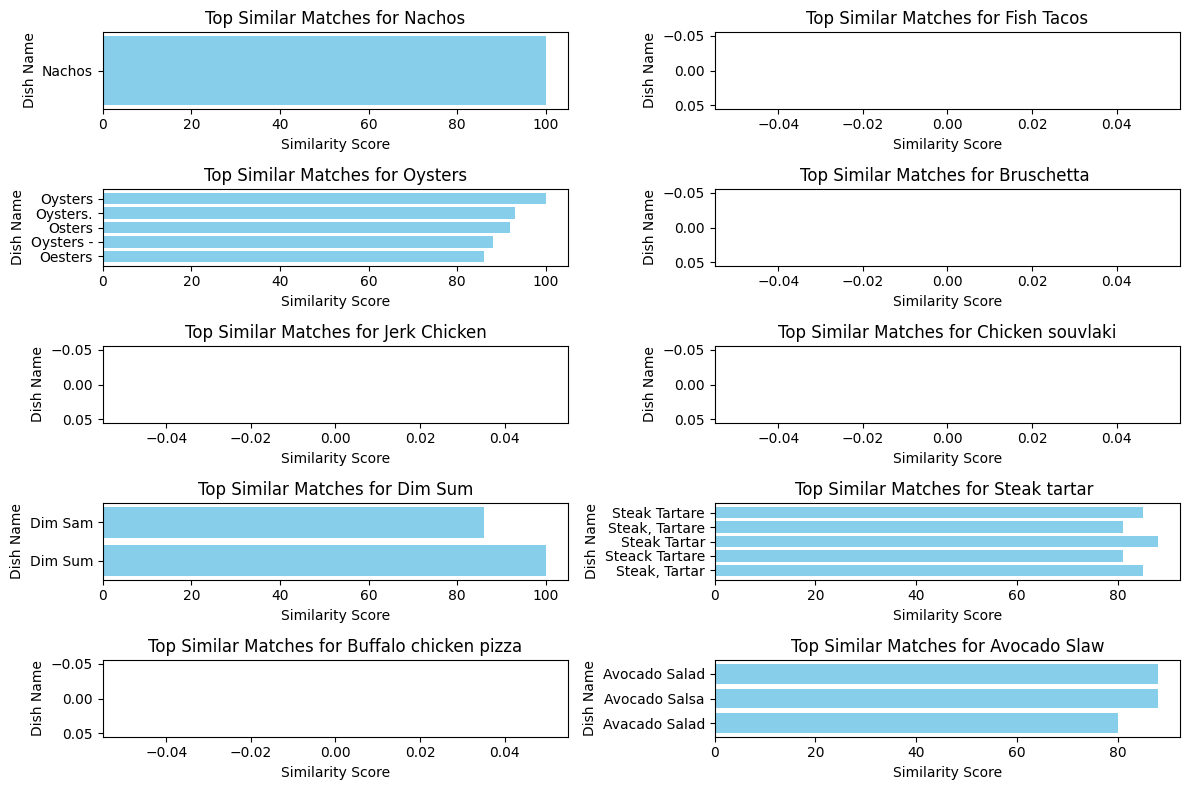

In [35]:
# # Dictionary to collect matches for each food name
# top_similar_matches = {}

# # Fills the dictionary with top similar matches
# for string in top_food_names_2_values:
#     similar_strings = find_similar_strings(string, dish['name'].unique())
#     top_similar_matches[string] = similar_strings[:5]  # Adjust to show top N similar matches

# # Plots the top similar matches for each food name
# plt.figure(figsize=(12, 8))
# for i, (food_name, similar_matches) in enumerate(top_similar_matches.items()):
#     plt.subplot(5, 2, i+1)
#     similar_names = [match[0] for match in similar_matches]
#     similarity_scores = [match[1] for match in similar_matches]
#     plt.barh(similar_names, similarity_scores, color='skyblue')
#     plt.xlabel('Similarity Score')
#     plt.ylabel('Dish Name')
#     plt.title(f'Top Similar Matches for {food_name}')
#     plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top
#     plt.tight_layout()

# plt.show()

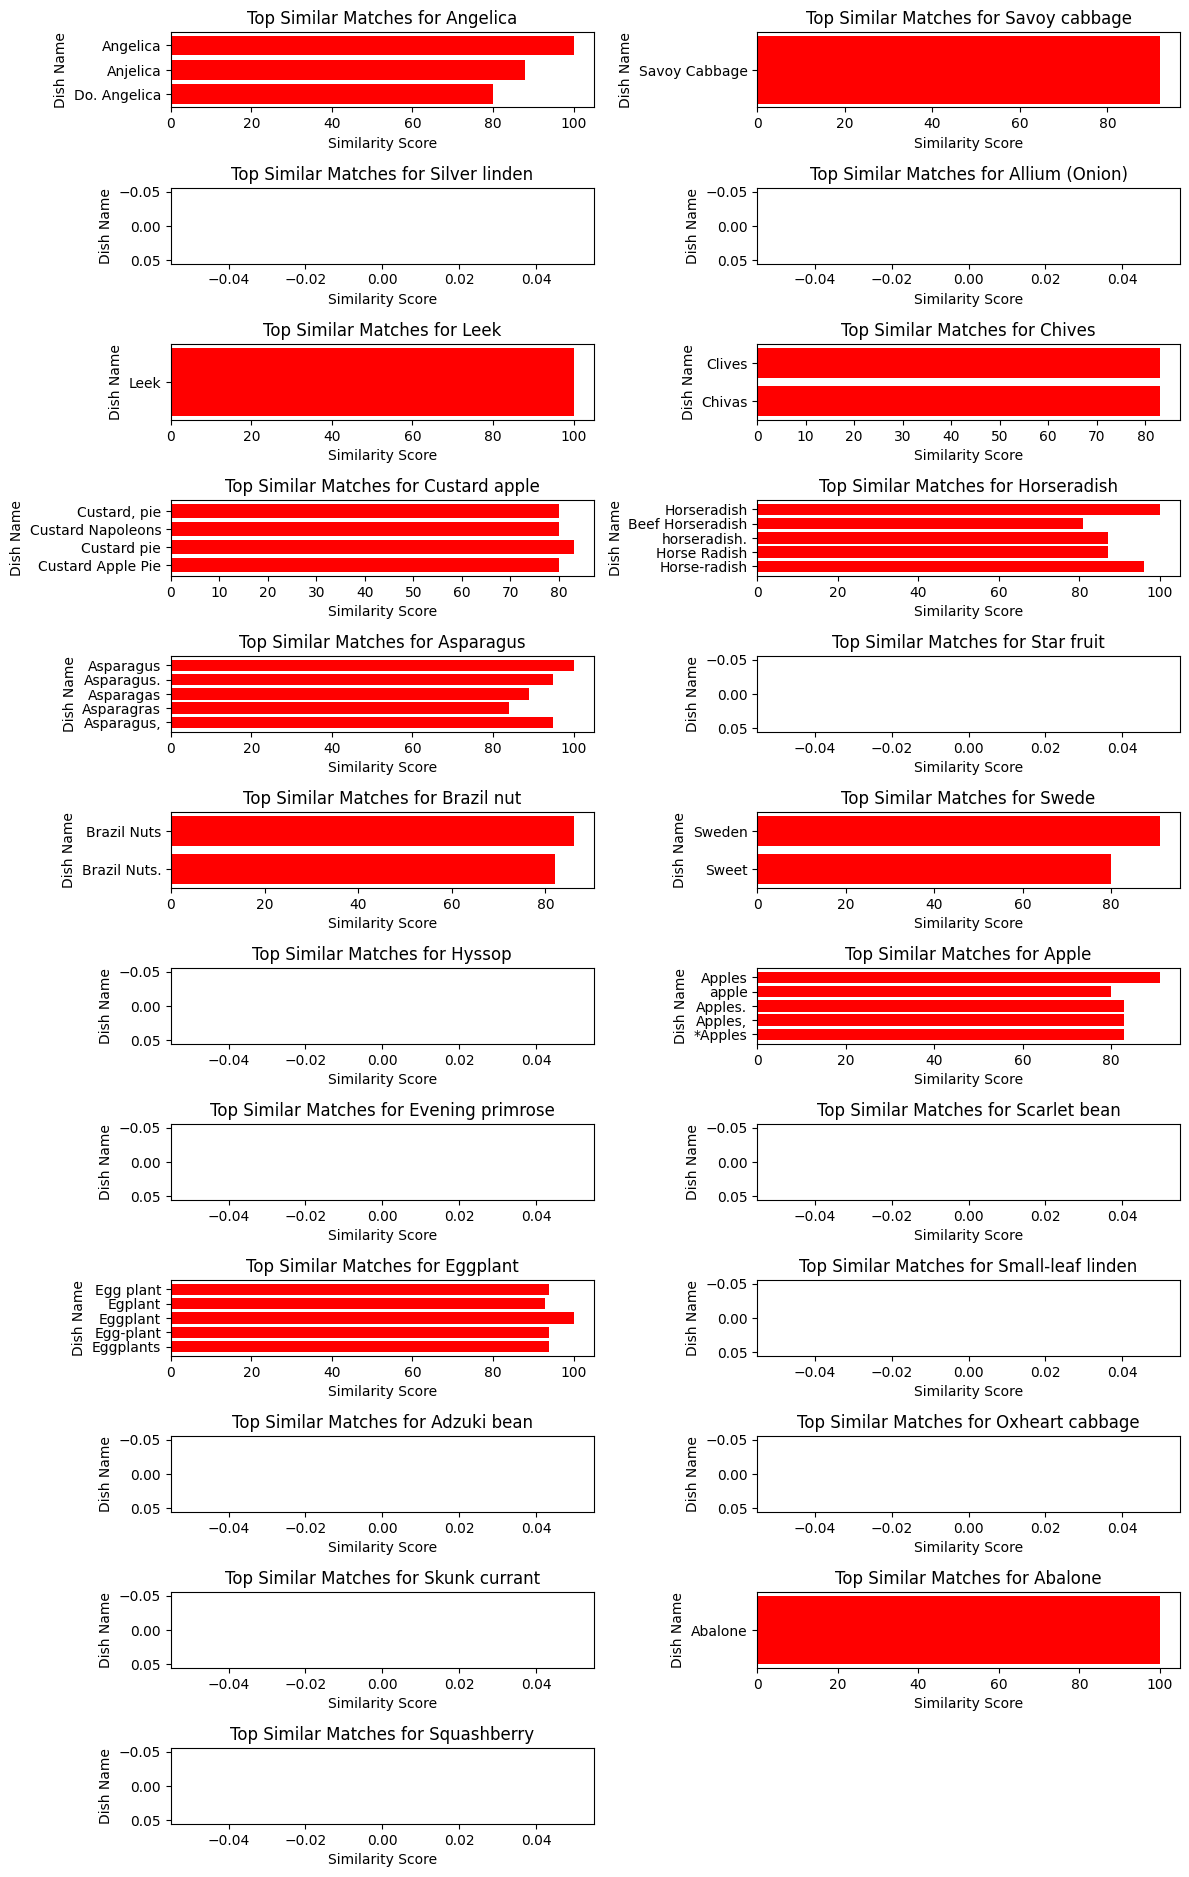

In [52]:
# # Create a dictionary to store top similar matches for each food name
# top_similar_matches = {}

# # Fill the dictionary with top similar matches
# for string in first_values:
#     similar_strings = find_similar_strings(string, dish['name'].unique())
#     top_similar_matches[string] = similar_strings[:5]
#     #print(first_values) # Adjust to show top N similar matches

# # Plot the top similar matches for each food name
# plt.figure(figsize=(12, 20))
# for i, (food_name, similar_matches) in enumerate(top_similar_matches.items()):
#     plt.subplot(13, 2, i+1)  
#     similar_names = [match[0] for match in similar_matches]
#     similarity_scores = [match[1] for match in similar_matches]
#     plt.barh(similar_names, similarity_scores, color='red')
#     plt.xlabel('Similarity Score')
#     plt.ylabel('Dish Name')
#     plt.title(f'Top Similar Matches for {food_name}')
#     plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top
#     plt.tight_layout()

# plt.show()


### Analysis 3: Dish Classification

In [122]:
# dishes = pd.read_csv('/Users/yusaeced/Desktop/data-foodmenu/Menus_Data/Dish.csv', na_values="", dtype=str)

0         consomme printaniere royal
1                      chicken gumbo
2                tomato aux croutons
3                    onion au gratin
4                        st. emilion
                     ...            
428235      chateau haut-brion, 1923
428236          chiffonnade  [salad]
428237                    au cresson
428238         baked colorado potato
428239                     cafe 2.00
Name: name, Length: 428240, dtype: object


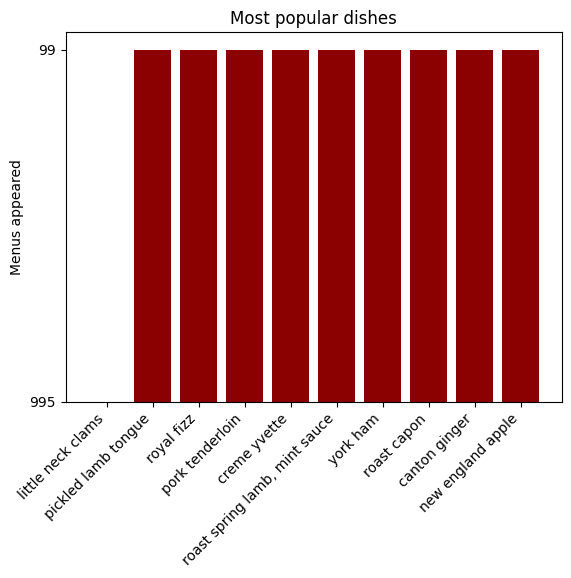

In [82]:
# dishes['name'] = dishes['name'].str.lower()
# print(dishes['name'])
# # Plot the most popular dishes
# top_dishes = dishes.sort_values(by='menus_appeared', ascending=False).head(10)
# plt.bar(top_dishes['name'], top_dishes['menus_appeared'], color='darkred')
# plt.xlabel('')
# plt.ylabel('Menus appeared')
# plt.title('Most popular dishes')
# plt.xticks(rotation=45, ha='right')
# plt.show()

In [128]:
# vegan_1 = pd.read_csv('/Users/yusaeced/Downloads/vegan_recipes.csv', na_values="", dtype=str)
# vegan_1['title']=vegan_1['title'].str.lower()
# print(vegan_1['title'])

# def check_vegan(name):
#     if name in vegan_1['title'].values:
#         return 'vegan'
#     else:
#         return 'no-veg-info'

# # Apply the function to each unique name in df1 and create a dictionary
# vegan_status_dict = {name: check_vegan(name) for name in dishes['name']}

# # Now map the vegan status back to the original df1 based on 'name'
# dishes['vegan_status'] = dishes['name'].map(vegan_status_dict)

# # Display the updated dataset
# print(dishes)

# vegan_counts = dishes['vegan_status'].value_counts()
# num_vegan = vegan_counts.get('vegan', 0)
# print("Number of rows with 'vegan' values:", num_vegan)

# # Filter dishes DataFrame to get only dishes marked as 'vegan'
# vegan_dishes = dishes[dishes['vegan_status'] == 'vegan']

# # Extract the dish names as a list
# vegan_dish_names = vegan_dishes['name'].tolist()

# print("List of vegan dishes:", vegan_dish_names)

0                                            rainbow rice
1                                                  nachos
2                                       hazelnut truffles
3                          simple roasted radish by chicp
4                                   baked apple charlotte
                              ...                        
1385                     west african peanut stew (vegan)
1386                                almond flour crackers
1387                baked vegan mac & cheese (+ stovetop)
1388    southwest chickpea salad + creamy avocado-lime...
1389                       besy vegan mushroom stroganoff
Name: title, Length: 1390, dtype: object
            id                        name description menus_appeared  \
0            1  Consomme printaniere royal         NaN              8   
1            2               Chicken gumbo         NaN            111   
2            3         Tomato aux croutons         NaN             14   
3            4             On

In [125]:
# vegan['Dish Name']=vegan['Dish Name'].str.lower()
# print(vegan['Dish Name'])

# def check_vegan(name):
#     if name in vegan['Dish Name'].values:
#         return 'vegan'
#     else:
#         return 'no-veg-info'

# # Apply the function to each unique name in df1 and create a dictionary
# vegan_status_dict = {name: check_vegan(name) for name in dishes['name']}

# # Now map the vegan status back to the original df1 based on 'name'
# dishes['vegan_status'] = dishes['name'].map(vegan_status_dict)

# # Display the updated dataset
# print(dishes)

# vegan_counts = dishes['vegan_status'].value_counts()
# num_vegan = vegan_counts.get('vegan', 0)
# print("Number of rows with 'vegan' values:", num_vegan)

# # Filter dishes DataFrame to get only dishes marked as 'vegan'
# vegan_dishes = dishes[dishes['vegan_status'] == 'vegan']

# # Extract the dish names as a list
# vegan_dish_names = vegan_dishes['name'].tolist()

# print("List of vegan dishes:", vegan_dish_names)

0                                   vegan tofu stir fry
1                           quinoa stuffed bell peppers
2                     vegetable curry with coconut milk
3                            chickpea and spinach salad
4                                           lentil soup
                             ...                       
172                                 roasted beet hummus
173                       caprese stuffed avocado toast
174    berry quinoa salad with lemon poppyseed dressing
175            grilled vegetable and goat cheese panini
176     cauliflower rice stir fry with mixed vegetables
Name: Dish Name, Length: 177, dtype: object
            id                        name description menus_appeared  \
0            1  Consomme printaniere royal         NaN              8   
1            2               Chicken gumbo         NaN            111   
2            3         Tomato aux croutons         NaN             14   
3            4             Onion au gratin      

In [24]:
# dishes = pd.read_csv('/Users/yusaeced/Desktop/data-foodmenu/Menus_Data/Dish.csv', na_values="", dtype=str)


# vegan_dishes['title']=vegan_dishes['title'].str.lower()
# print(vegan_dishes['title'])

# def check_vegan(name):
#     if name in vegan_dishes['title'].values:
#         return 'vegan'
#     else:
#         return 'no-veg-info'

# # Apply the function to each unique name in df1 and create a dictionary
# vegan_status_dict = {name: check_vegan(name) for name in dishes['name']}

# # Now map the vegan status back to the original df1 based on 'name'
# dishes['vegan_status'] = dishes['name'].map(vegan_status_dict)

# # Display the updated dataset
# print(dishes)

# vegan_counts = dishes['vegan_status'].value_counts()
# num_vegan = vegan_counts.get('vegan', 0)
# print("Number of rows with 'vegan' values:", num_vegan)

# # Filter dishes DataFrame to get only dishes marked as 'vegan'
# vegan_dishes = dishes[dishes['vegan_status'] == 'vegan']

# # Extract the dish names as a list
# vegan_dish_names = vegan_dishes['name'].tolist()

# print("List of vegan dishes:", vegan_dish_names)

0                                            rainbow rice
1                                                  nachos
2                                       hazelnut truffles
3                          simple roasted radish by chicp
4                                   baked apple charlotte
                              ...                        
1385                     west african peanut stew (vegan)
1386                                almond flour crackers
1387                baked vegan mac & cheese (+ stovetop)
1388    southwest chickpea salad + creamy avocado-lime...
1389                       besy vegan mushroom stroganoff
Name: title, Length: 1390, dtype: object
            id                        name description menus_appeared  \
0            1  Consomme printaniere royal         NaN              8   
1            2               Chicken gumbo         NaN            111   
2            3         Tomato aux croutons         NaN             14   
3            4             On

### Appendix 1 - DFs

In [8]:
# menu.head()

id name                     sponsor                 event       venue  \
0  12463  NaN               HOTEL EASTMAN             BREAKFAST  COMMERCIAL   
1  12464  NaN            REPUBLICAN HOUSE              [DINNER]  COMMERCIAL   
2  12465  NaN  NORDDEUTSCHER LLOYD BREMEN  FRUHSTUCK/BREAKFAST;  COMMERCIAL   
3  12466  NaN  NORDDEUTSCHER LLOYD BREMEN                LUNCH;  COMMERCIAL   
4  12467  NaN  NORDDEUTSCHER LLOYD BREMEN               DINNER;  COMMERCIAL   

                                place         physical_description occasion  \
0                     HOT SPRINGS, AR              CARD; 4.75X7.5;  EASTER;   
1                    MILWAUKEE, [WI];   CARD; ILLUS; COL; 7.0X9.0;  EASTER;   
2  DAMPFER KAISER WILHELM DER GROSSE;    CARD; ILLU; COL; 5.5X8.0;      NaN   
3  DAMPFER KAISER WILHELM DER GROSSE;    CARD; ILLU; COL; 5.5X8.0;      NaN   
4  DAMPFER KAISER WILHELM DER GROSSE;  FOLDER; ILLU; COL; 5.5X7.5;      NaN   

                                               notes call_number keywords  \
0                                                NaN   1900-2822      NaN   
1  WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...   1900-2825      NaN   
2  MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...   1900-2827      NaN   
3  MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...   1900-2828      NaN   
4  MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...   1900-2829      NaN   

  language        date                    location location_type currency  \
0      NaN  1900-04-15               Hotel Eastman           NaN      NaN   
1      NaN  1900-04-15            Republican House           NaN      NaN   
2      NaN  1900-04-16  Norddeutscher Lloyd Bremen           NaN      NaN   
3      NaN  1900-04-16  Norddeutscher Lloyd Bremen           NaN      NaN   
4      NaN  1900-04-16  Norddeutscher Lloyd Bremen           NaN      NaN   

  currency_symbol    status page_count dish_count  
0             NaN  complete          2         67  
1             NaN  complete          2         34  
2             NaN  complete          2         84  
3             NaN  complete          2         63  
4             NaN  complete          4         33

In [6]:
# menu_page

id menu_id page_number image_id full_height full_width  \
0        119   12460           1  1603595        7230       5428   
1        120   12460           2  1603596        5428       7230   
2        121   12460           3  1603597        7230       5428   
3        122   12460           4  1603598        7230       5428   
4        123   12461           1  1603591        7230       5428   
...      ...     ...         ...      ...         ...        ...   
66932  77427   35526           6  5194216        2772       2341   
66933  77428   35526           7  5194217        2772       2301   
66934  77429   35526           8  5194218        2763       2530   
66935  77430   35526           1  5194219        5440       5237   
66936  77431   35526           2  5194220        5466       5237   

                                       uuid  
0      510d47e4-2955-a3d9-e040-e00a18064a99  
1      510d47e4-2956-a3d9-e040-e00a18064a99  
2      510d47e4-2957-a3d9-e040-e00a18064a99  
3      510d47e4-2958-a3d9-e040-e00a18064a99  
4      510d47e4-2959-a3d9-e040-e00a18064a99  
...                                     ...  
66932  cc70ae50-6212-0132-8b23-58d385a7bbd0  
66933  cc844a40-6212-0132-6ead-58d385a7bbd0  
66934  cc985890-6212-0132-9cd3-58d385a7bbd0  
66935  e51c88c0-6212-0132-ef5e-58d385a7bbd0  
66936  e5361730-6212-0132-04e2-58d385a7bbd0  

[66937 rows x 7 columns]

In [5]:
# menu_item

id menu_page_id price high_price dish_id  \
0              1         1389   0.4        NaN       1   
1              2         1389   0.6        NaN       2   
2              3         1389   0.4        NaN       3   
3              4         1389   0.5        NaN       4   
4              5         3079   0.5        1.0       5   
...          ...          ...   ...        ...     ...   
1334898  1389466        67519   0.1        0.9  387565   
1334899  1389467        67519   0.1        0.9  387567   
1334900  1389468        60565   2.5        NaN  520888   
1334901  1389469        56189   NaN        NaN  162186   
1334902  1389470        74083   NaN        NaN  520892   

                      created_at               updated_at      xpos      ypos  
0        2011-03-28 15:00:44 UTC  2011-04-19 04:33:15 UTC  0.111429  0.254735  
1        2011-03-28 15:01:13 UTC  2011-04-19 15:00:54 UTC  0.438571  0.254735  
2        2011-03-28 15:01:40 UTC  2011-04-19 19:10:05 UTC      0.14  0.261922  
3        2011-03-28 15:01:51 UTC  2011-04-19 19:07:01 UTC  0.377143   0.26272  
4        2011-03-28 15:21:26 UTC  2011-04-13 15:25:27 UTC  0.105714  0.313178  
...                          ...                      ...       ...       ...  
1334898  2021-08-19 23:20:27 UTC  2021-08-19 23:20:27 UTC  0.497333  0.834271  
1334899  2021-08-19 23:20:38 UTC  2021-08-19 23:20:38 UTC  0.494667  0.842923  
1334900  2021-08-21 22:49:44 UTC  2021-08-21 23:14:53 UTC      0.24  0.259456  
1334901  2021-09-13 18:33:05 UTC  2021-09-13 18:33:05 UTC  0.157333  0.267943  
1334902  2021-09-14 13:47:32 UTC  2021-09-14 13:47:53 UTC  0.378667  0.541733  

[1334903 rows x 9 columns]

In [9]:
# dish

id                        name description menus_appeared  \
0            1  Consomme printaniere royal         NaN              8   
1            2               Chicken gumbo         NaN            111   
2            3         Tomato aux croutons         NaN             14   
3            4             Onion au gratin         NaN             41   
4            5                 St. Emilion         NaN             66   
...        ...                         ...         ...            ...   
428235  520889    Chateau Haut-Brion, 1923         NaN              1   
428236  520890        Chiffonnade  [salad]         NaN              1   
428237  520891                  Au Cresson         NaN              1   
428238  520892       baked colorado potato         NaN              1   
428239  520893                   CAFE 2.00         NaN              1   

       times_appeared first_appeared last_appeared lowest_price highest_price  
0                   8           1897          1927          0.2           0.4  
1                 117           1895          1960          0.1           0.8  
2                  14           1893          1917         0.25           0.4  
3                  41           1900          1971         0.25           1.0  
4                  68           1881          1981          0.0          18.0  
...               ...            ...           ...          ...           ...  
428235              1              0             0          0.0           0.0  
428236              1              0             0          0.0           0.0  
428237              0              0             0          0.0           0.0  
428238              1              0             0          0.0           0.0  
428239              1              0             0          0.0           0.0  

[428240 rows x 9 columns]

In [ ]:
# food_names_1

In [ ]:
# food_names_2

In [ ]:
# vegan

In [ ]:
# vegan_dishes